Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
import matplotlib

from brokenaxes import brokenaxes

# Formatting

Matplotlib parameters 

In [2]:
plt.rcParams.update({
    # Fonts - Times, 8-12 pt
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times"],
    "font.size": 12,                  # Base size 8-12 pt
    # Axes
    "axes.titlesize": 12,             # Axis title size
    "axes.labelsize": 12,             # Axis label size
    "axes.labelweight": "normal",     # Normal weight
    "axes.titleweight": "normal",     # Normal weight for titles
    # Ticks
    "xtick.labelsize": 9,             # X tick label size (8-12)
    "ytick.labelsize": 9,             # Y tick label size (8-12)
    "xtick.direction": "in",          # Tick direction
    "ytick.direction": "in",          # Tick direction
    # Legends
    "legend.fontsize": 12,            # Legend text size (8-12)
    "legend.title_fontsize": 12,      # Legend title size (8-12)
    "legend.loc": 'best',             # Automatic location
    # Resolution
    # "figure.dpi": 500,                # Display DPI  UNCOMMENT LATER. I commented it out now while I work on it, because Jupyter displayed pixel size = figsize * figure.dpi, causing huge images now in the notebook
    "figure.dpi": 100,
    "savefig.dpi": 500,               # Save DPI (300-600)
    "savefig.bbox": "tight",          # Crop whitespace
    # Without LaTeX
    "text.usetex": False,             # PLOS does not accept LaTeX EPS
    "mathtext.fontset": "dejavuserif",# Match math fonts to serif
})

Colors

In [49]:
## Reusable color utility
# I use this one
import numpy as np
import matplotlib.pyplot as plt

def make_color_map(values, cmap, vmin=0.25, vmax=1.0):
    '''
    Function that takes array of values and make a colormap for them
    '''
    values_sorted = sorted(values)
    colors = cmap(np.linspace(vmin, vmax, len(values)))
    return dict(zip(values_sorted, colors))

# To be given value
v_rest = [-22, -17, -12.3, -8.5]
pqif_vector = [0, 0.25, 0.5, 0.75, 1]

# Make colors once
color_map_vrest = make_color_map(v_rest, plt.cm.Reds)  # Reds for vrest
color_map_pqif = make_color_map(pqif_vector[1:-1], plt.cm.Greens)  # Greens for pqif

# Explicit endpoints for pqif
color_map_pqif[pqif_vector[0]] = 'black'
color_map_pqif[pqif_vector[-1]] = 'steelblue'


In [51]:
print(color_map_vrest)

{-22: array([0.98823529, 0.73207228, 0.62992695, 1.        ]), -17: array([0.98357555, 0.41279508, 0.28835063, 1.        ]), -12.3: array([0.79257209, 0.0932872 , 0.11298731, 1.        ]), -8.5: array([0.40392157, 0.        , 0.05098039, 1.        ])}


# Store values for plotting
Here I take out all the data I am interested in from the file system, and store it in a dedicated dataframe and dictionary. I make a dataframe with all values associated with a connectivity matrix and an ID, and a dictionary mapping ID to an array storing the weights (flattened). I do this so that I can loop through and plot everything from it in one go.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########

vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 49)] 


########## Dataframe and dictionary ##########

rows = []  # Container for rows of dataframe
weights_dict = {}  # Dictionary for weight arrays

for dyn in dynamics:

    # Simulation number corresponding to dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    for sim, vr, f in zip(simulation_number, vrest, slope):
        for pqif in pqif_number:
            for seed in seed_number:
                # Loop through simulations of pqif across seeds


                dataframe_title = f'{dyn}\simulation_{sim}\simulation_{sim}_connectivity_matrix\simulation_{sim}_connectivity_pqif_{pqif}_iloop_11_seed_{seed}' # load dataframe

                simulation_id = f'{dyn}_{sim}_{pqif}_{seed}'  # Shared across dataframe and dictionary

                try:  # Notify if something did not exist
                    weights_df = pd.read_csv(dataframe_title, header=None).values
                except FileNotFoundError:
                    print(f"File not found: {dataframe_title}, will be skipped.")
                    continue  # Go to next iteration


                # Flatten to 1D array
                weights = weights_df.flatten()

                # Standard deviation and mean of weights for current seed of vrest/slope and pqif
                sd = np.std(weights)
                mean = np.mean(weights)

                if pqif == 1:
                    vr = None
                    f = slope_qif


                row = [simulation_id, dyn, sim, vr, f, pqif, seed, sd, mean]  # Store all data associated with the connectivity matrix + a simulationID to the weights in dictionary
                rows.append(row)  # Append row to what becomes the dataframe later

                weights_dict[simulation_id] = weights  # Dictionary mapping simulationID to weight array


########## Make dataframe ##########

columns = ['simulationID', 'dynamic', 'simulation', 'vrest', 'slope', 'pqif', 'seed', 'std', 'mean']
df = pd.DataFrame(rows, columns=columns)


########## Make a copy of dataframe for further use ##########

wDF = df.copy()

########## Print statements to control ##########
print(wDF.head())
print(wDF.tail())
print(weights_dict)
# for i in weights_dict.items():
#     print(i)

File not found: oscillations\simulation_1\simulation_1_connectivity_matrix\simulation_1_connectivity_pqif_0_iloop_11_seed_10, will be skipped.
File not found: oscillations\simulation_1\simulation_1_connectivity_matrix\simulation_1_connectivity_pqif_0_iloop_11_seed_11, will be skipped.
File not found: oscillations\simulation_1\simulation_1_connectivity_matrix\simulation_1_connectivity_pqif_0_iloop_11_seed_12, will be skipped.
File not found: oscillations\simulation_1\simulation_1_connectivity_matrix\simulation_1_connectivity_pqif_0_iloop_11_seed_13, will be skipped.
File not found: oscillations\simulation_1\simulation_1_connectivity_matrix\simulation_1_connectivity_pqif_0_iloop_11_seed_14, will be skipped.
File not found: oscillations\simulation_1\simulation_1_connectivity_matrix\simulation_1_connectivity_pqif_0_iloop_11_seed_15, will be skipped.
File not found: oscillations\simulation_1\simulation_1_connectivity_matrix\simulation_1_connectivity_pqif_0_iloop_11_seed_16, will be skipped.

In [49]:
# pqif=1 have the same slope in each simulation and vrest=None

wDF_filtered1 = wDF[(wDF['seed'] == 1) & (wDF['pqif'] == 1)]

display(wDF_filtered1)

,simulationID,dynamic,simulation,vrest,slope,pqif,seed,std,mean
197,oscillations_1_1_1,oscillations,1,NaN,10.74,1.0,1,0.285916,-0.000104
442,oscillations_2_1_1,oscillations,2,NaN,10.74,1.0,1,0.290347,-0.000295
687,oscillations_3_1_1,oscillations,3,NaN,10.74,1.0,1,0.292879,0.000282
932,oscillations_4_1_1,oscillations,4,NaN,10.74,1.0,1,0.289391,-0.000156
1177,sequences_9_1_1,sequences,9,NaN,10.74,1.0,1,0.145354,0.021705
1422,sequences_10_1_1,sequences,10,NaN,10.74,1.0,1,0.146780,0.021211
1667,sequences_11_1_1,sequences,11,NaN,10.74,1.0,1,0.145545,0.021583
1912,sequences_12_1_1,sequences,12,NaN,10.74,1.0,1,0.143227,0.021785


# Figures

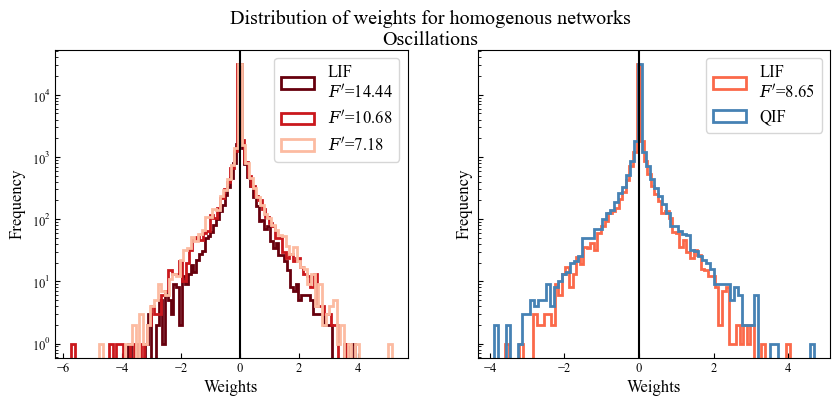

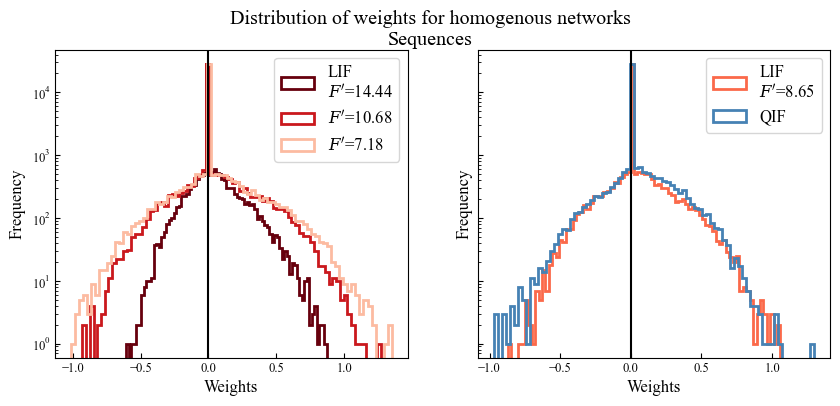

In [50]:
# ========== Histogram of weight distribution for homogenous networks ==========

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = [10.74]
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 1)] # Only use one seed for this

########## Figure loop ##########
for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    #### Create figure and axes

    fig, (ax1, ax2) = plt.subplots(
        nrows=1, ncols=2,
        figsize=(10,4),  # TODO review
        sharey=True
    )

    # ax_map = {
    #     'A': axes[0],
    #     'B': axes[1],
    # }

    for sim, vr, f in zip(simulation_number, vrest, slope):
        for pqif in pqif_homogenous:
            for seed in seed_number:

                #### Take out values to plot

                df_filtered = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == pqif) & (wDF['seed'] == seed)]  # Current row of dataframe with metadata

                ID = df_filtered['simulationID'].item()  # Simulation ID

                current_weights = weights_dict[ID]  # Weight array (flattened)


                #### Color formatting

                if pqif == 1:
                    colors = 'steelblue'
                else:
                    colors = color_map_vrest[vr]


                #### Figure control flow

                if pqif == 0 and f in [14.44, 10.68, 7.18]:  # Left

                    if sim == simulation_number[0]:  # LIF header in legend
                        label = f"LIF\n$F'$={f}"
                    else:
                        label = f"$F'$={f}"

                    ax1.hist(current_weights, bins=80, log=True, color=colors, alpha=1, linewidth=2, histtype='step', label=label)
                    
                elif f == 8.65:  # Right
                    if pqif == 0:
                        label = f"LIF\n$F'$={f}"
                    else:
                        label = 'QIF'

                    ax2.hist(current_weights, bins=80, log=True, color=colors, alpha=1, linewidth=2, histtype='step', label=label)

                else:  # Ignore others
                    continue


    #### Shared formatting
    plt.suptitle(f"Distribution of weights for homogenous networks\n{dyn.capitalize()}")
    for ax in (ax1, ax2):
        ax.legend()
        ax.set_xlabel("Weights")
        ax.set_ylabel("Frequency")
        ax.axvline(0, color="black")
    plt.show()

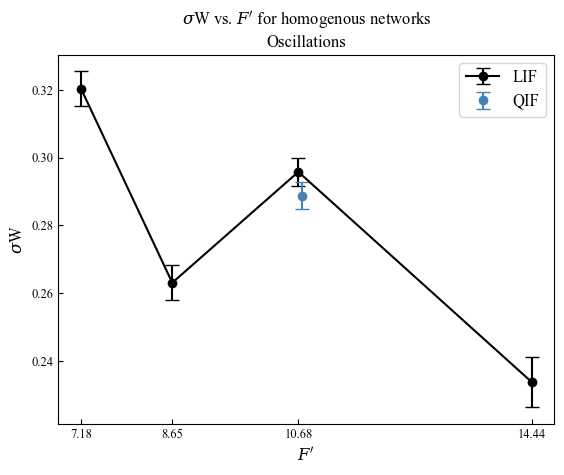

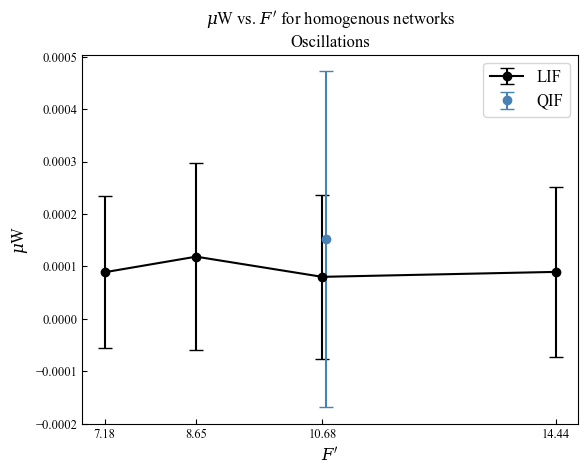

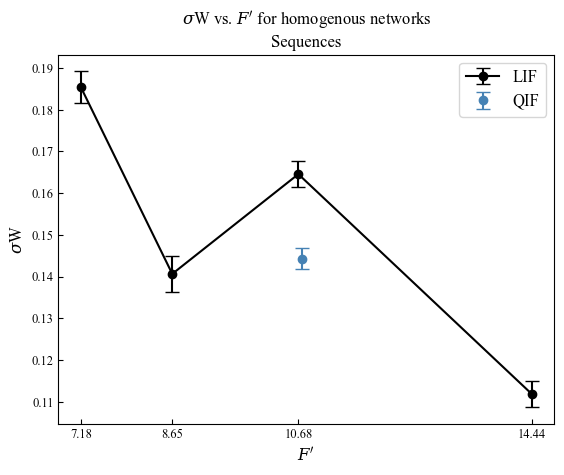

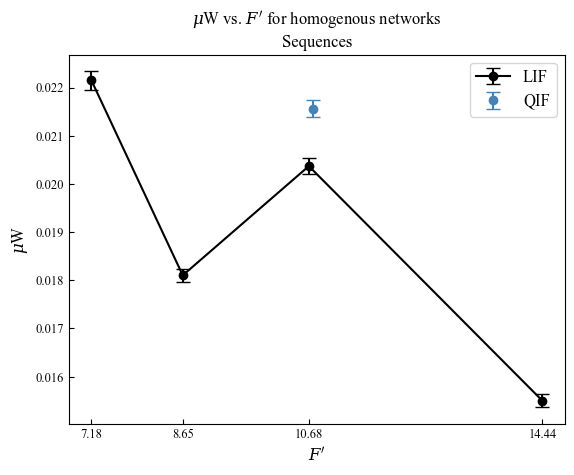

In [51]:
# ========== Standard deviation or Mean of weights vs. slope for homogenous networks ==========

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 50)]

columns = ['std', 'mean']

x_ticks = [14.44, 10.68, 8.65, 7.18]

########## Figure loop ##########

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    #### Plot same figures for both STD and mean
    for c in columns:

        fig, ax = plt.subplots()


        for pqif in pqif_homogenous:

            y = []
            yerr = []
            x = slope


            for sim, vr, f in zip(simulation_number, vrest, slope):

                df_filtered = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == pqif)]  # Current row of dataframe with metadata. Include all seeds since we want errorbars

                # Y: Mean of Y
                y_i = df_filtered[c].mean()

                # Y-error: STD of Y
                yerr_i = df_filtered[c].std()

                if pqif == 0: # For LIF: Make list across slope
                    y.append(y_i)
                    yerr.append(yerr_i)

                elif pqif == 1:  # Only one value for QIF since it is the same in each simulation
                    y = y_i
                    yerr = yerr_i

            colors = color_map_pqif[pqif]

            #### Title and labels depending on if STD or mean 

            if c == 'std':
                title = f"$\sigma$W vs. $F'$ for homogenous networks\n{dyn.capitalize()}"
                xlabel = f"$F'$"
                ylabel = f"$\sigma$W"

            elif c == "mean":
                title = f"$\mu$W vs. $F'$ for homogenous networks\n{dyn.capitalize()}"
                xlabel = f"$F'$"
                ylabel = f"$\mu$W"

            #### Plot values on ax

            if pqif == 0:
                label = 'LIF'
                ax.errorbar(x, y, yerr, fmt='o-', capsize=5, color=colors, label=label)

            elif pqif == 1:
                label = 'QIF'
                ax.errorbar(slope_qif, y, yerr, fmt='o', capsize=5, color=colors, label=label)

        ax.set_title(title)
        ax.set_xticks(x_ticks)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        plt.legend()
        plt.show()



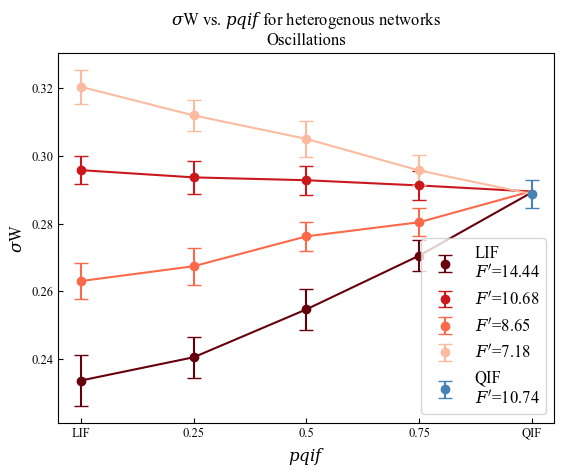

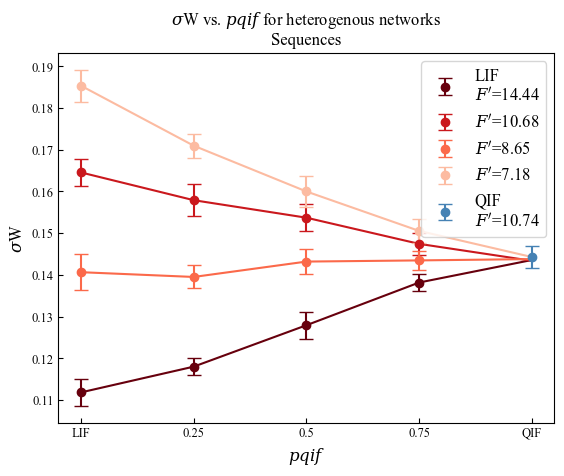

In [52]:
# ========== Standard deviation of weights vs. pqif for heterogenous networks ==========

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 50)]

columns = ['std']

x_ticks = ['LIF', 0.25, 0.5, 0.75, 'QIF']

########## Figure loop ##########

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    #### Plot same figures for both STD and mean
    for c in columns:

        fig, ax = plt.subplots()


        for sim, vr, f in zip(simulation_number, vrest, slope):

            y = []
            yerr = []
            x = pqif_number

            for pqif in pqif_number:


                df_filtered = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == pqif)]  # Current row of dataframe with metadata. Include all seeds since we want errorbars

                # Y: Mean of Y
                y_i = df_filtered[c].mean()

                # Y-error: STD of Y
                yerr_i = df_filtered[c].std()


                y.append(y_i)
                yerr.append(yerr_i)


            if (sim == simulation_number[0]):
                label = f"LIF\n$F'$={f}"
            else:
                label = f"$F'$={f}"

            
            ########## For formatting purposes, I plot double to allow connecting lines to QIF without having errorbars on top of eachother for QIF specifically ##########

            no_qif_x = x[:-1]
            no_qif_y = y[:-1]
            no_qif_yerr = yerr[:-1]

            ax.plot(x, y, linestyle='-', color=color_map_vrest[vr], label=None)
            ax.errorbar(no_qif_x, no_qif_y, no_qif_yerr, fmt='o', capsize=5, markersize=6, color=color_map_vrest[vr], label=label)

            # ax.errorbar(x, y, yerr, fmt='o-', capsize=5, color=color_map_vrest[vr], label=label)  # original

        
            ########## Title and tick labels ##########
            if c == 'std':
                title = f"$\sigma$W vs. $pqif$ for heterogenous networks\n{dyn.capitalize()}"
                xlabel = f"$pqif$"
                ylabel = f"$\sigma$W"

            elif c == "mean":
                title = f"$\mu$W vs. $pqif$ for heterogenous networks\n{dyn.capitalize()}"
                xlabel = f"$pqif$"
                ylabel = f"$\mu$W"


        ########## Add QIF ##########
        df_filtered_qif = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == 1)]

        y_qif = df_filtered_qif[c].mean()  # y
        yerr_qif = df_filtered_qif[c].std()  # y-error
        x_qif = 1  # x

        ax.errorbar(x_qif, y_qif, yerr_qif, fmt='o', markersize=6, capsize=5, color='steelblue', label=f"QIF\n$F'$={slope_qif}")

        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_xticks(pqif_number, x_ticks)
        ax.set_ylabel(ylabel)
        plt.legend()
        plt.show()

    
    

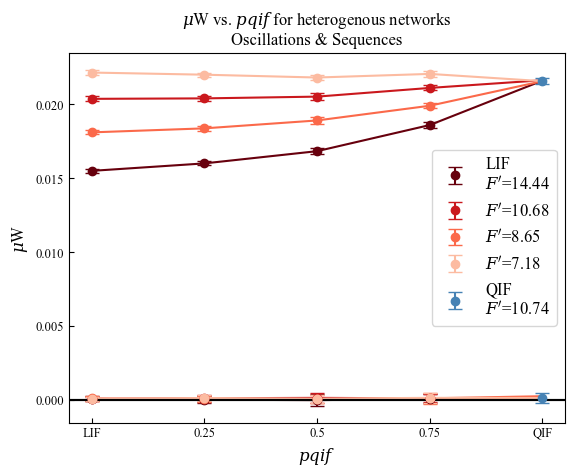

In [53]:
# ========== Mean of weights vs. pqif for heterogenous networks ==========

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 50)]

columns = ['mean']

x_ticks = ['LIF', 0.25, 0.5, 0.75, 'QIF']

########## Figure loop ##########

fig, ax = plt.subplots()  # Both dynamics should be in the same figure for this one

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()


    #### Plot same figures for both STD and mean
    for c in columns:



        for sim, vr, f in zip(simulation_number, vrest, slope):

            y = []
            yerr = []
            x = pqif_number

            for pqif in pqif_number:


                df_filtered = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == pqif)]  # Current row of dataframe with metadata. Include all seeds since we want errorbars

                # Y: Mean of Y
                y_i = df_filtered[c].mean()

                # Y-error: STD of Y
                yerr_i = df_filtered[c].std()


                y.append(y_i)
                yerr.append(yerr_i)


            if (sim == simulation_number[0]):
                label = f"LIF\n$F'$={f}"
            else:
                label = f"$F'$={f}"

            if dyn == 'sequences':
                label = None


            ########## For formatting purposes, I plot double to allow connecting lines to QIF without having errorbars on top of eachother for QIF specifically ##########

            no_qif_x = x[:-1]
            no_qif_y = y[:-1]
            no_qif_yerr = yerr[:-1]


            # ax.errorbar(x, y, yerr, fmt='o', capsize=5, color=color_map_vrest[vr], label=label)
            ax.errorbar(no_qif_x, no_qif_y, no_qif_yerr, fmt='o', capsize=5, color=color_map_vrest[vr], label=label)
            ax.plot(x, y, linestyle='-', color=color_map_vrest[vr], label=None)

        
        ########## Title and tick labels ##########
        if c == 'std':
            title = f"$\sigma$W vs. $pqif$ for heterogenous networks\n{dyn.capitalize()}"
            xlabel = f"$pqif$"
            ylabel = f"$\sigma$W"

        elif c == "mean":
            title = f"$\mu$W vs. $pqif$ for heterogenous networks\nOscillations & Sequences"
            xlabel = f"$pqif$"
            ylabel = f"$\mu$W"


        ########## Add QIF ##########
        df_filtered_qif = wDF[(wDF['dynamic'] == dyn) & (wDF['simulation'] == sim) & (wDF['pqif'] == 1)]

        y_qif = df_filtered_qif[c].mean()  # y
        yerr_qif = df_filtered_qif[c].std()  # y-error
        x_qif = 1  # x

        if dyn == 'oscillations': # first
            label = f"QIF\n$F'$={slope_qif}"
        else:
            label = None


        ax.errorbar(x_qif, y_qif, yerr_qif, fmt='o', capsize=5, color='steelblue', label=label)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_xticks(pqif_number, x_ticks)
    ax.set_ylabel(ylabel)
    ax.axhline(0, color='black')


plt.legend()
# plt.show()

## Need both dynamics to be run, TODO

    
    


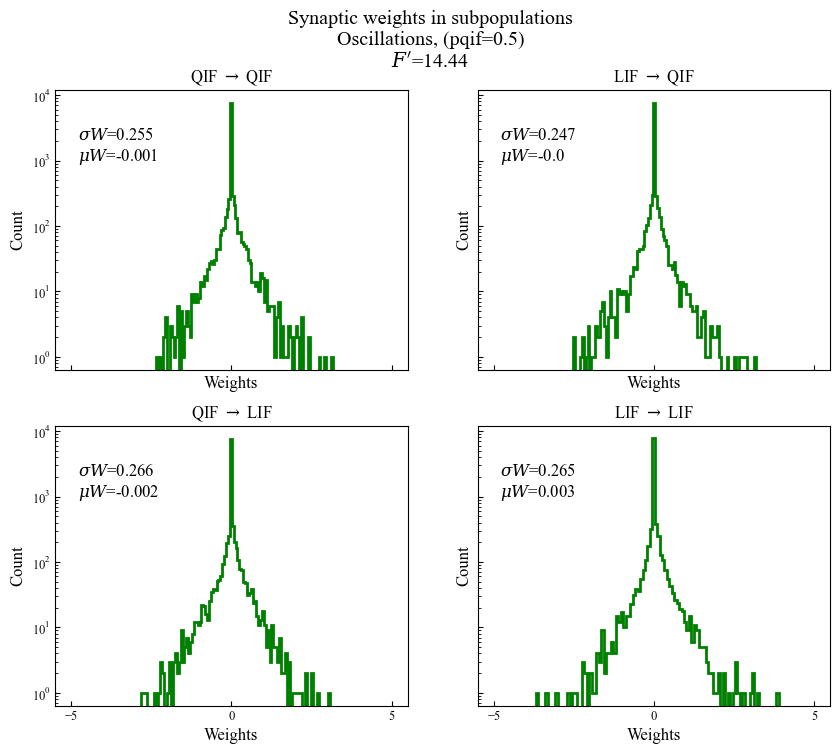

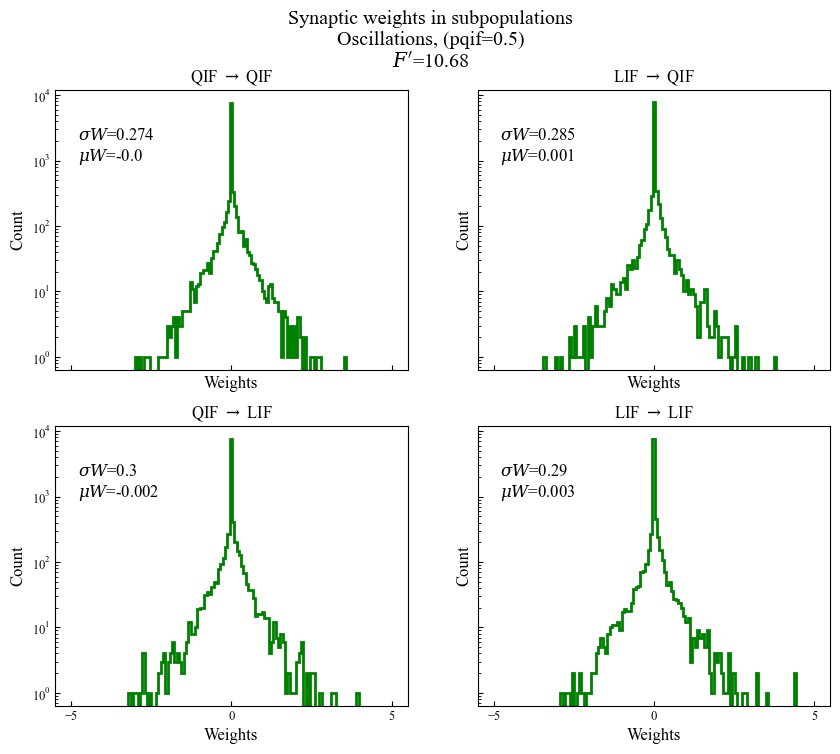

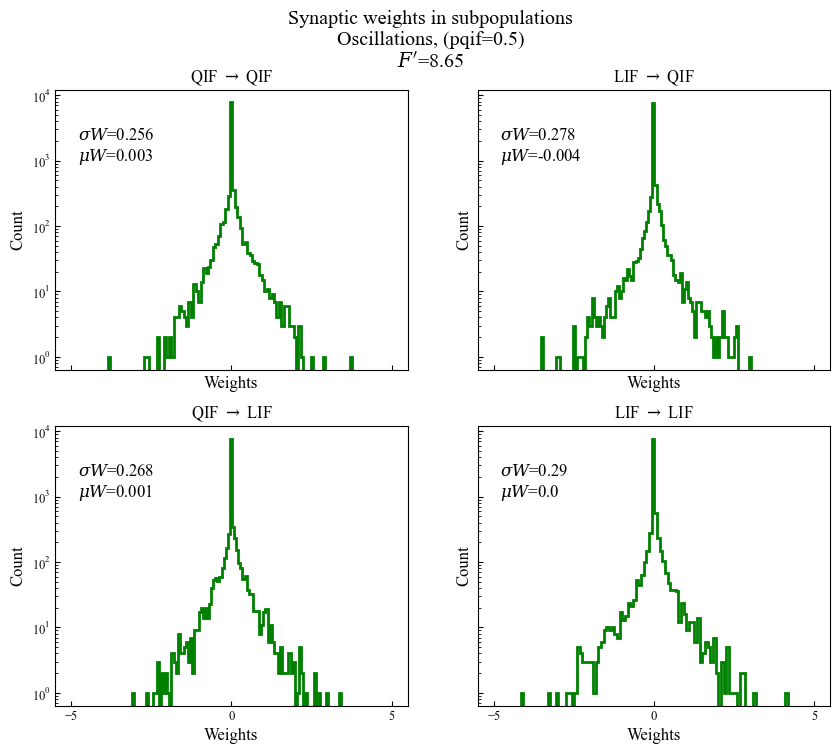

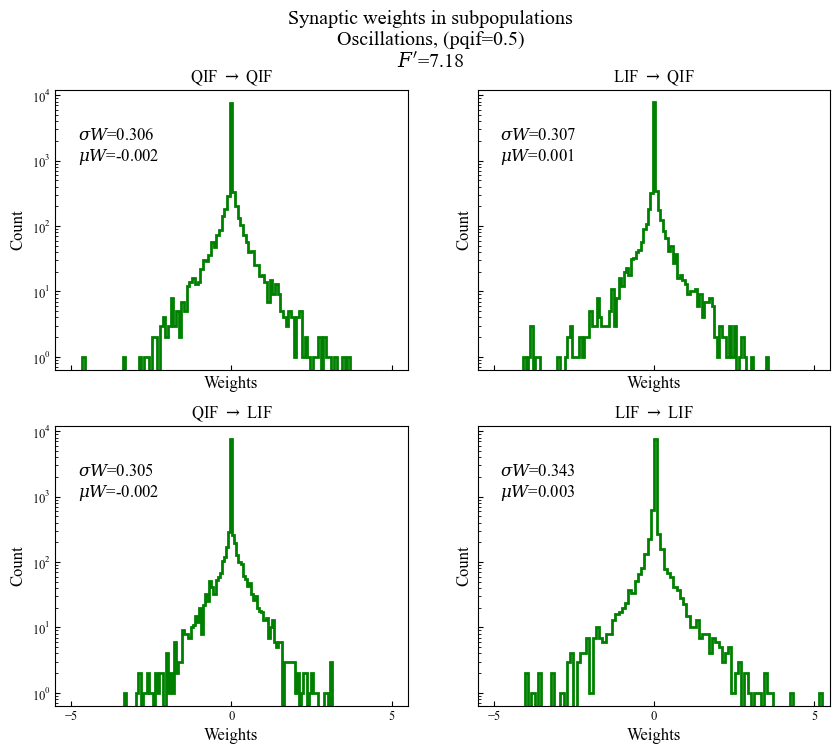

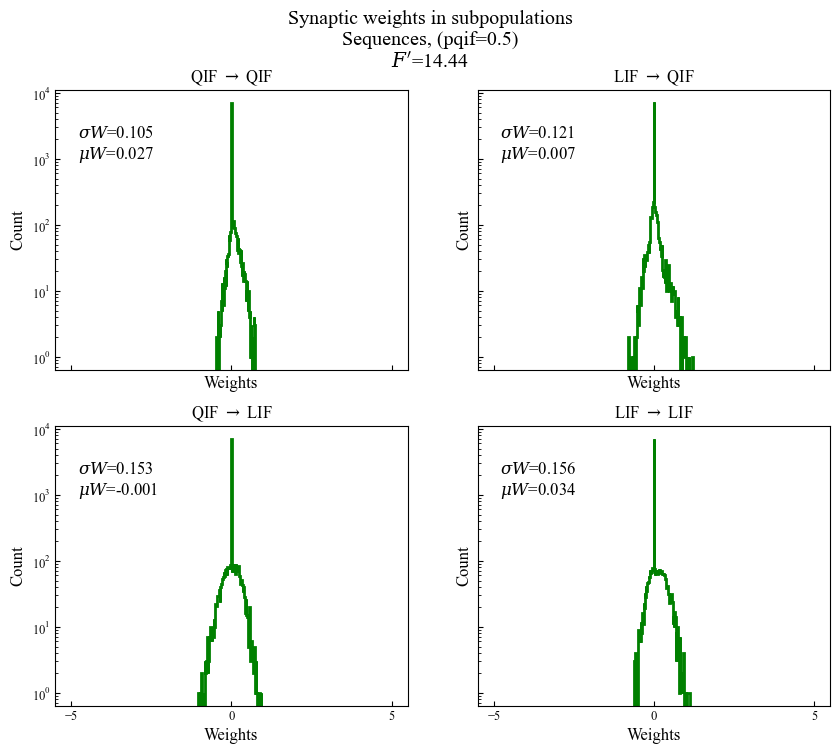

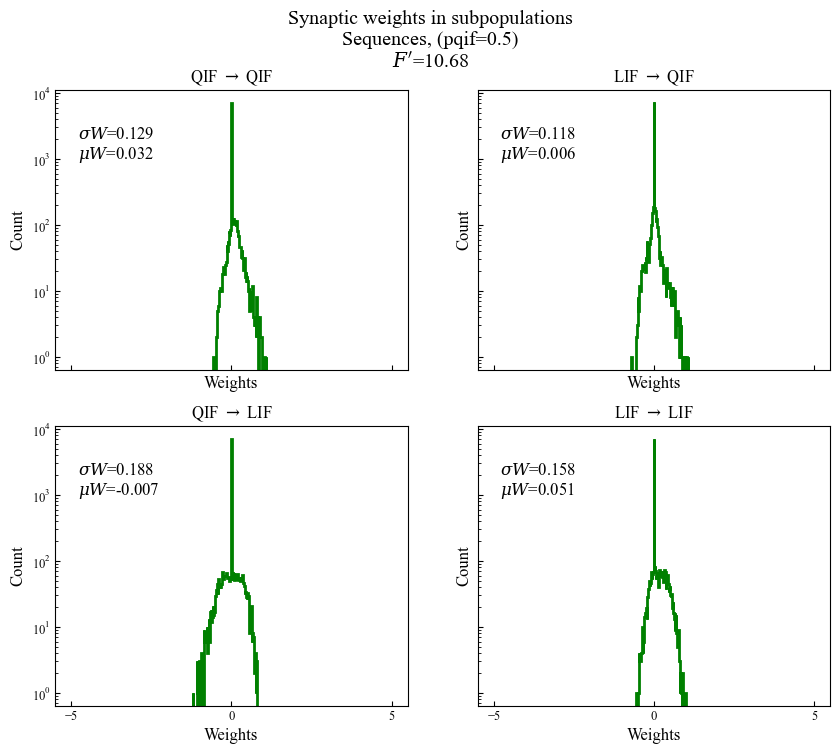

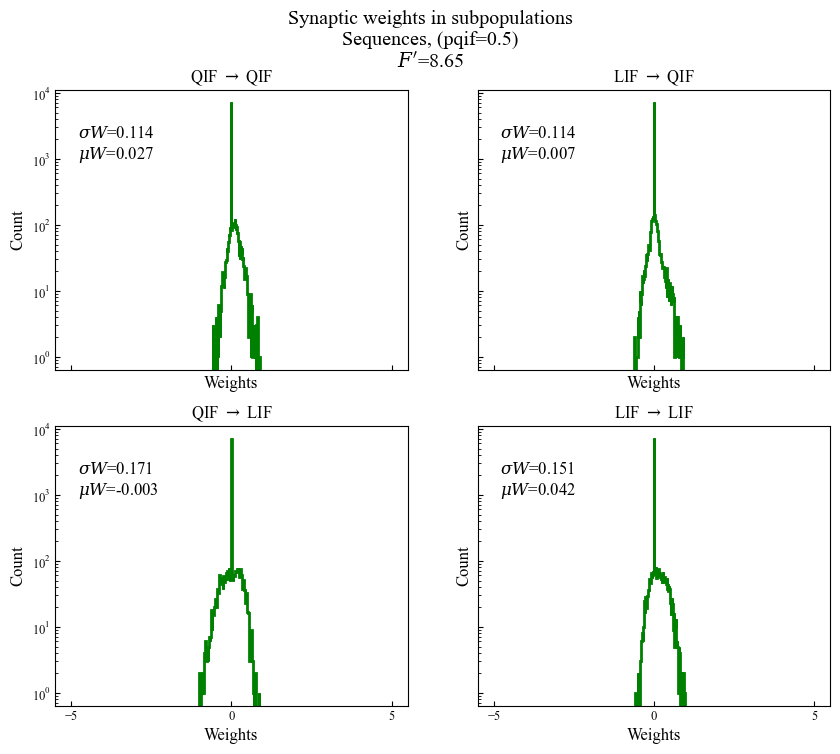

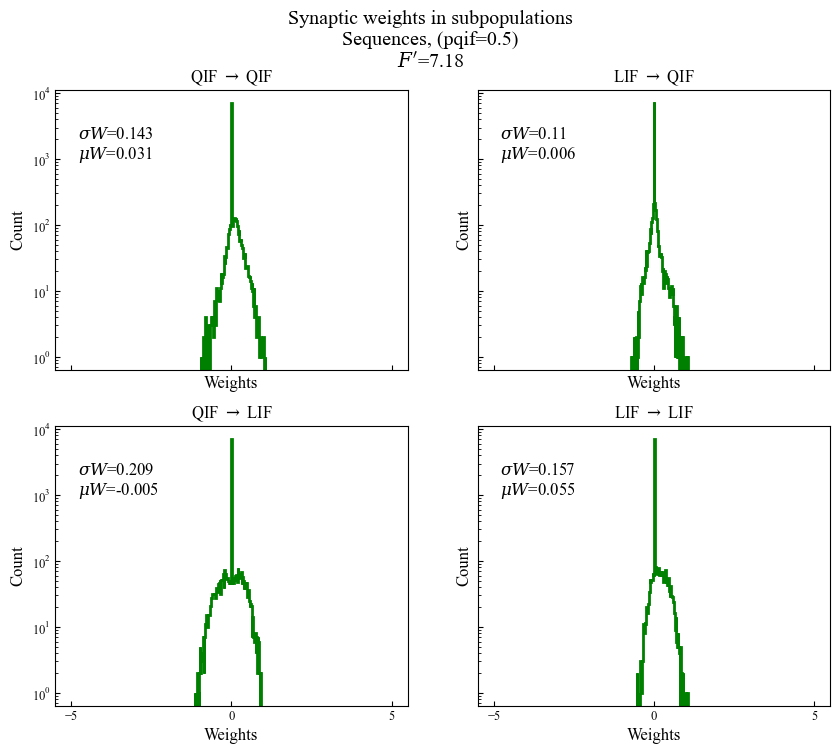

In [54]:
# ========== Breakdown of subpopulations ==========

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

########## Loop variables ##########
# simulation_number = [1, 2, 3, 4]

vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

# pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_number = [0.5]
pqif_homogenous = [0, 1]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 1)]

columns = ['mean']

x_ticks = ['LIF', 0.25, 0.5, 0.75, 'QIF']


for dyn in dynamics:

    # Simulation number corresponding to dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    for sim, vr, f in zip(simulation_number, vrest, slope):

        fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)  # TODO review

        for pqif in pqif_number:
            for seed in seed_number:
                # Loop through simulations of pqif across seeds

                fig.suptitle(f"Synaptic weights in subpopulations\n{dyn.capitalize()}, (pqif={pqif})\n$F'$={f}")

                dataframe_title = f'{dyn}\simulation_{sim}\simulation_{sim}_connectivity_matrix\simulation_{sim}_connectivity_pqif_{pqif}_iloop_11_seed_{seed}' # load dataframe

                simulation_id = f'{dyn}_{sim}_{pqif}_{seed}'  # Shared across dataframe and dictionary

                try:  # Notify if something did not exist
                    weights_df = pd.read_csv(dataframe_title, header=None)
                except FileNotFoundError:
                    print(f"File not found: {dataframe_title}, will be skipped.")
                    continue  # Go to next iteration

                r, c = weights_df.shape  # rows, columns

                
                if r % 2 != 0 or c % 2 != 0:  # check if even
                    sys.exit(f"Error: Matrix has odd dimensions ({r} x {c}), cannot split evenly.")

                r_mid = r // 2  # Find middle of rows
                c_mid = c // 2  # Find middle of columns

                q1 = weights_df.iloc[:r_mid, :c_mid].copy()  # qif-->qif
                q2 = weights_df.iloc[:r_mid, c_mid:].copy()  # lif-->qif
                q3 = weights_df.iloc[r_mid:, :c_mid].copy()  # qif-->lif
                q4 = weights_df.iloc[r_mid:, c_mid:].copy()  # lif --> lif

                list_of_quadrants = [q1, q2, q3, q4]

                list_of_titles = [(rf"QIF $\rightarrow$ QIF"), (rf"LIF $\rightarrow$ QIF"), (rf"QIF $\rightarrow$ LIF"), (rf"LIF $\rightarrow$ LIF")]

        axs_flat = axs.flat

        for i, (q, title) in enumerate(zip(list_of_quadrants, list_of_titles)):
            ax = axs_flat[i]
            # ax = axs
            data = q.values.flatten()  # take out values and flatten into 1D

            sd = np.std(data)
            sd_rounded = np.round(sd, decimals=3)
            mean = np.mean(data)
            mean_rounded = np.round(mean, decimals=3)

            ticks = [-5, 0, 5]

            ax.hist(data, bins=100, log=True, histtype='step', linewidth=2, color='green')
            ax.set_title(title)
            ax.text(-4.8, 10**3, f"$\sigma$$W$={sd_rounded}\n$\mu$$W$={mean_rounded}")
            ax.set_xlabel('Weights')
            ax.set_xlim(-5.5, 5.5)
            ax.set_xticks(ticks)
            ax.set_ylabel('Count')
        plt.show()



In [56]:
########## New version

# ========== Quantification of breakdown between subpopulations ==========

import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]
pqif_heterogenous = [0.25, 0.5, 0.75]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 50)]


########## Figure variables ##########
x = [1, 2, 3, 4]  # q1...q4
x_ticks = [(rf"QIF $\rightarrow$ QIF"), (rf"LIF $\rightarrow$ QIF"), (rf"QIF $\rightarrow$ LIF"), (rf"LIF $\rightarrow$ LIF")]


########## Make dataframe with necessary valyes ##########

rows = []  # Will be a dataframe with all values needed

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()


    # row = []
    for pqif in pqif_heterogenous:

        # fig, ax = plt.subplots()


        for sim, vr, f in zip(simulation_number, vrest, slope):

            # y = []
            # yerr = []
            # x = x

            for seed in seed_number:


                ## Access total weight matrix
                df = pd.read_csv(f'{dyn}\simulation_{sim}\simulation_{sim}_connectivity_matrix\simulation_{sim}_connectivity_pqif_{pqif}_iloop_11_seed_{seed}', header=None)

                ## Total rows, columns
                r, c = df.shape  # rows, columns (type: int)

                ## Find cut
                r_cut = int(r * pqif)  # first pqif_num rows are QIF
                c_cut = int(c * pqif)  # first pqif_num columns are QIF


                ## Make quadrants based on cut
                # (Row, column start with QIF up to pqif)
                # Columns are presynaptic, rows are postsynaptic
                q1 = df.iloc[:r_cut, :c_cut].copy()  # qif-->qif
                q2 = df.iloc[:r_cut, c_cut:].copy()  # lif-->qif   
                q3 = df.iloc[r_cut:, :c_cut].copy()  # qif-->lif
                q4 = df.iloc[r_cut:, c_cut:].copy()  # lif --> lif

                
                list_of_quadrants = [q1, q2, q3, q4]
                names = [f"q{i}" for i in range(1, len(list_of_quadrants) +1)]
                # print(names)

                


                for q, nm in zip(list_of_quadrants, names):
                    # One row
                    q_flattened = q.values.flatten()  # Take out values of quadrant, and flatten into 1D
                    name = nm
                    mean = np.mean(q_flattened)
                    sd = np.std(q_flattened)
                    shape = q.shape

                    row = [dyn, pqif, seed, sim, vr, f, name, shape, mean, sd]
                    rows.append(row)


columns = ['dyn', 'pqif', 'seed', 'sim', 'vr', 'f', 'quadrant', 'shape', 'mean', 'sd']
df_stats = pd.DataFrame(rows, columns=columns)
q_stats = df_stats.copy() # This copy now contains all values needed to plot these types of figures
display(q_stats)


########## Figure plotting ##########


,dyn,pqif,seed,sim,vr,f,quadrant,shape,mean,sd
0,oscillations,0.25,0,1,-8.5,14.44,q1,"(50, 50)",-0.000578,0.225790
1,oscillations,0.25,0,1,-8.5,14.44,q2,"(50, 150)",0.000107,0.221770
2,oscillations,0.25,0,1,-8.5,14.44,q3,"(150, 50)",0.002893,0.245557
3,oscillations,0.25,0,1,-8.5,14.44,q4,"(150, 150)",-0.000423,0.257995
4,oscillations,0.25,1,1,-8.5,14.44,q1,"(50, 50)",-0.004617,0.222153
...,...,...,...,...,...,...,...,...,...,...
4795,sequences,0.75,48,12,-22.0,7.18,q4,"(50, 50)",0.083605,0.160558
4796,sequences,0.75,49,12,-22.0,7.18,q1,"(150, 150)",0.019521,0.144887
4797,sequences,0.75,49,12,-22.0,7.18,q2,"(150, 50)",0.034524,0.099923
4798,sequences,0.75,49,12,-22.0,7.18,q3,"(50, 150)",-0.001974,0.193911


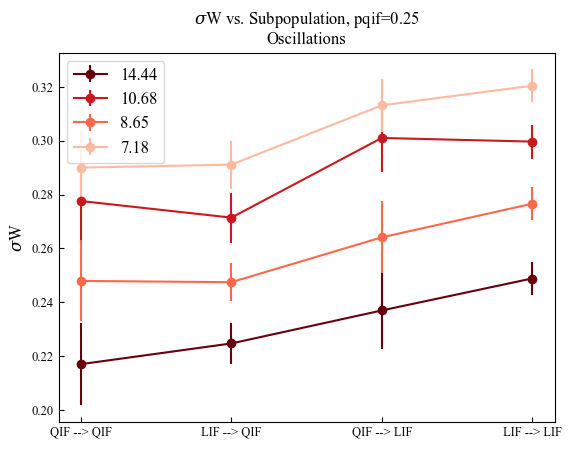

[array([(50, 50)], dtype=object), array([(50, 150)], dtype=object), array([(150, 50)], dtype=object), array([(150, 150)], dtype=object)]


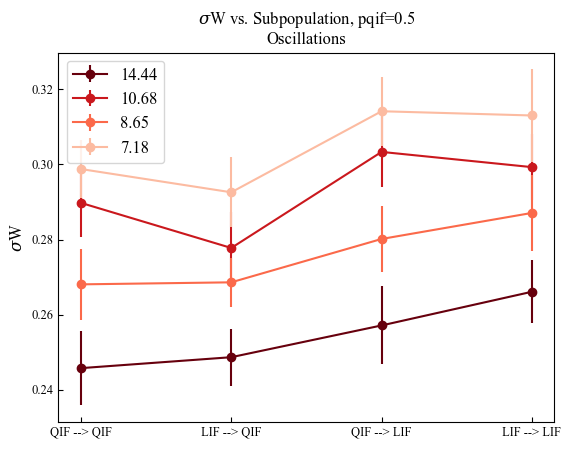

[array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object)]


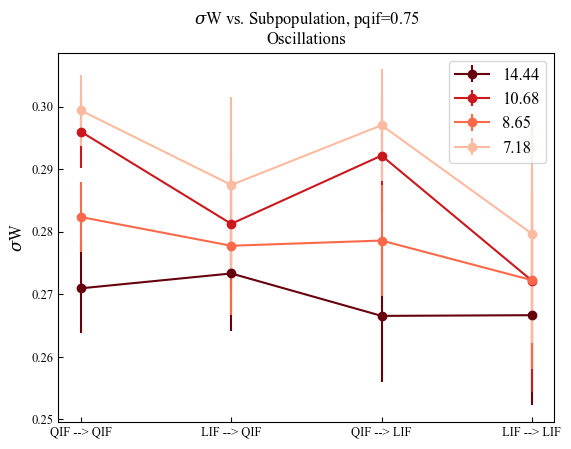

[array([(150, 150)], dtype=object), array([(150, 50)], dtype=object), array([(50, 150)], dtype=object), array([(50, 50)], dtype=object)]


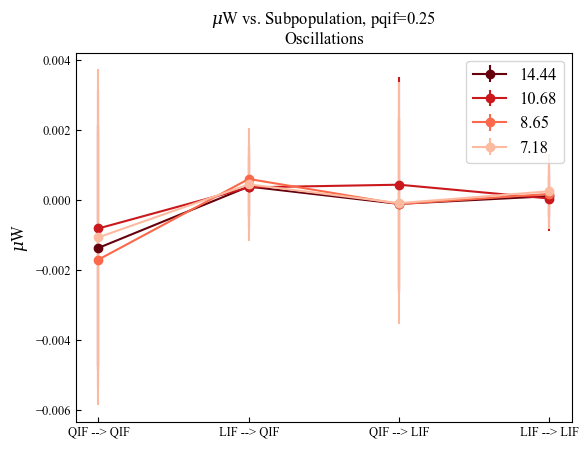

[array([(50, 50)], dtype=object), array([(50, 150)], dtype=object), array([(150, 50)], dtype=object), array([(150, 150)], dtype=object)]


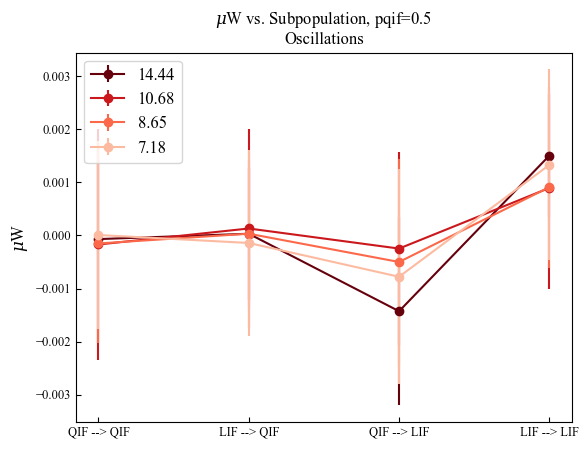

[array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object)]


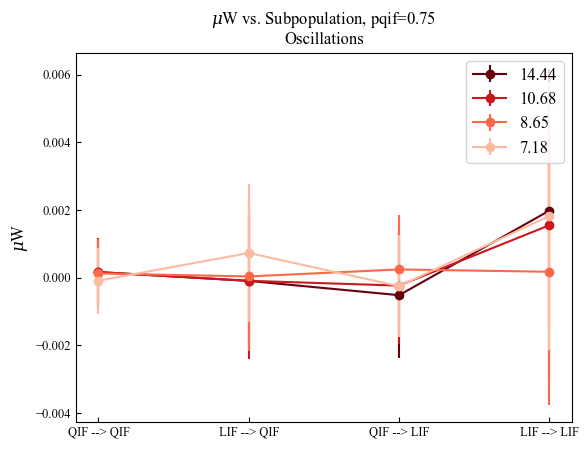

[array([(150, 150)], dtype=object), array([(150, 50)], dtype=object), array([(50, 150)], dtype=object), array([(50, 50)], dtype=object)]


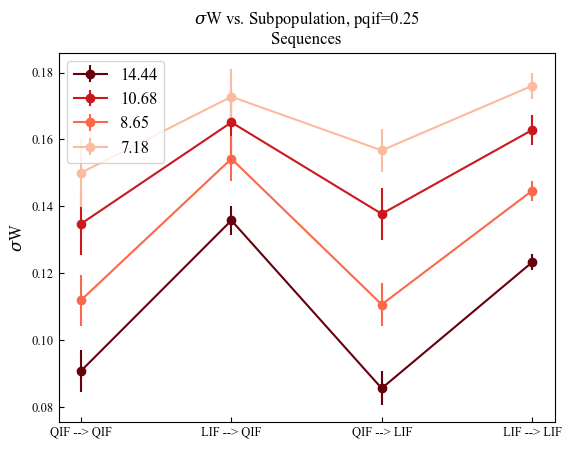

[array([(50, 50)], dtype=object), array([(50, 150)], dtype=object), array([(150, 50)], dtype=object), array([(150, 150)], dtype=object)]


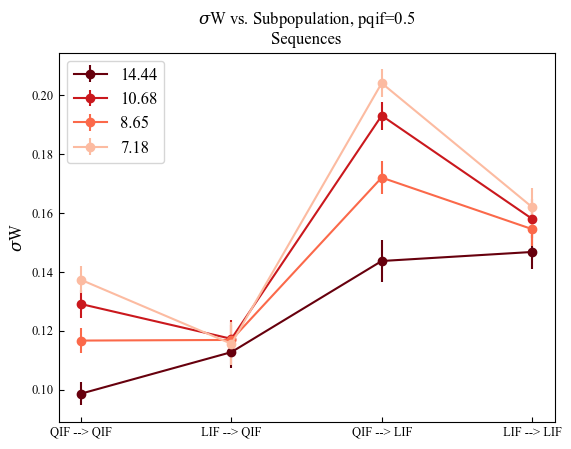

[array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object)]


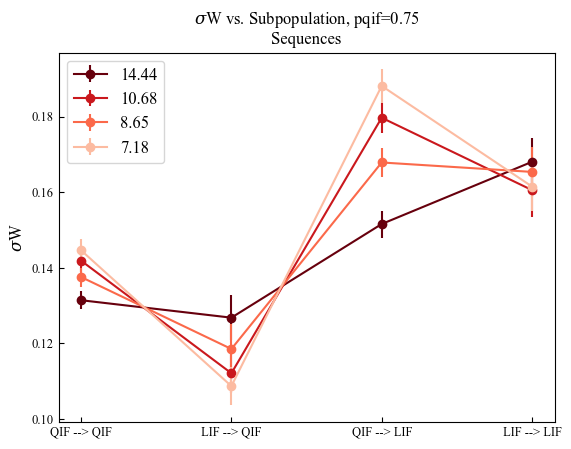

[array([(150, 150)], dtype=object), array([(150, 50)], dtype=object), array([(50, 150)], dtype=object), array([(50, 50)], dtype=object)]


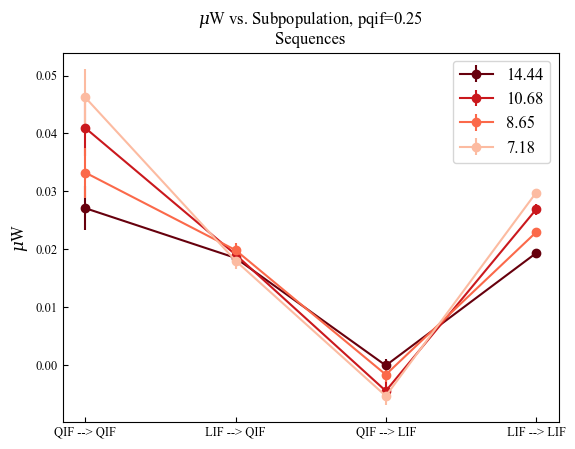

[array([(50, 50)], dtype=object), array([(50, 150)], dtype=object), array([(150, 50)], dtype=object), array([(150, 150)], dtype=object)]


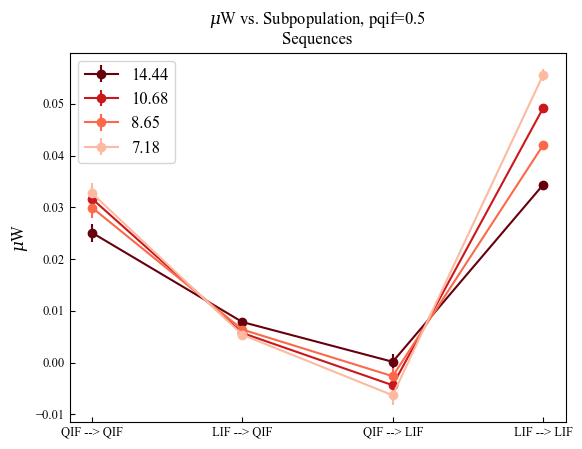

[array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object), array([(100, 100)], dtype=object)]


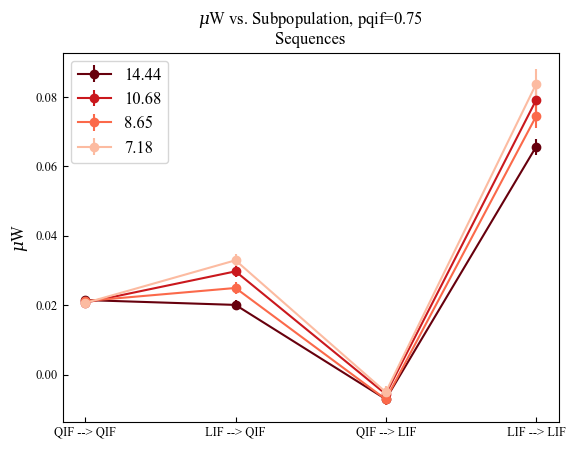

[array([(150, 150)], dtype=object), array([(150, 50)], dtype=object), array([(50, 150)], dtype=object), array([(50, 50)], dtype=object)]


In [58]:
import pandas as pd
import numpy as np
import matplotlib
import sys


########## Loop variables ##########
vrest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74
all_slopes = [14.44, 10.68, 10.74, 8.65, 7.18]

pqif_number = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]
pqif_heterogenous = [0.25, 0.5, 0.75]

dynamics = ['oscillations', 'sequences']
# dynamics = ['oscillations']
seed_number = [i for i in range(0, 50)]


########## Figure variables ##########
x = [1, 2, 3, 4]  # q1...q4
x_ticks = [(rf"QIF $\rightarrow$ QIF"), (rf"LIF $\rightarrow$ QIF"), (rf"QIF $\rightarrow$ LIF"), (rf"LIF $\rightarrow$ LIF")]
# x_ticks = [(f"QIF $\rightarrow$ QIF"), (f"LIF $\rightarrow$ QIF"), (f"QIF $\rightarrow$ LIF"), (f"LIF $\rightarrow$ LIF")]
names = [f"q{i}" for i in range(1, len(list_of_quadrants) +1)]
quantifications = ['sd', 'mean']

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()

    for quantification in quantifications:  # we do this for both mean and standard deviation


        for pqif in pqif_heterogenous:

            fig, ax = plt.subplots()

            if quantification == 'sd':
                title = f"$\sigma$W vs. Subpopulation, pqif={pqif}"
                ylabel = f"$\sigma$W"
            elif quantification == 'mean':
                title = f"$\mu$W vs. Subpopulation, pqif={pqif}"
                ylabel = f"$\mu$W"

            for sim, vr, f in zip(simulation_number, vrest, slope):

                y = []
                yerr = []
                shape = []

                for q in names:

                        df_filtered = q_stats[(q_stats['sim'] == sim) & (q_stats['pqif'] == pqif) & (q_stats['quadrant'] == q)]

                        # x, y, yerr
                        # y_i = df_filtered[quantification].mean()  # Mean across seeds
                        # yerr_i = df_filtered[quantification].std()  # SD across seeds

                        # Try with:
                        y.append(df_filtered[quantification].mean())
                        yerr.append(df_filtered[quantification].std())

                        # y.append(y_i)
                        # yerr.append(yerr_i)

                        shape.append(df_filtered['shape'].unique())


                ########## x_ticks formatting ##########
                

                x = x  # which quadrant from 1, ..., 4
                ax.errorbar(x, y, yerr, fmt='o-', color=color_map_vrest[vr], label=f"{f}")

                # prefix = [(r"QIF $\rightarrow$ QIF"), (r"LIF $\rightarrow$ QIF"), (r"QIF $\rightarrow$ LIF"), (r"LIF $\rightarrow$ LIF")]
                prefix = [(f"QIF --> QIF"), (f"LIF --> QIF"), (f"QIF --> LIF"), (f"LIF --> LIF")]
                shapes = [v.item() for v in shape]  # Converts to the form: [(row, col), ..., (row, col)]
                shapes_formatted = [f"({a} x {b})" for a, b in shapes]  # Nicer formatting
                suffix = [f"(Post, Pre)" for a in range(1, 5)]

                x_tick_labels = {
                    f"{prefix}\n{sh}\n{suffix}"
                    for sh in shapes_formatted
                }
            
                # ax.set_xticklabels(x_tick_labels)

            xpos = [1, 2, 3, 4]
            xticks = ["test", "test", "test", "test"]
            prefix = [(f"QIF --> QIF"), (f"LIF --> QIF"), (f"QIF --> LIF"), (f"LIF --> LIF")]
            ax.set_title(f"{title}\n{dyn.capitalize()}")
            ax.set_ylabel(ylabel)
            ax.set_xticks(xpos)
            ax.set_xticklabels(prefix)
            # ax.set_xticks(xpos)

            plt.legend()
            plt.show()
            print(shape)

                        # display(df_filtered)


Firing rate


$S_{t,n}$ tells whether a neuron $n$ spikes in millisecond $t$, with $t=1,...,M$ and $n=1,...,N$. For a single neuron it is summed across time: $k_n=\sum_{t=1}^{M} S_{t,n}$. Firing rate is then given by $r_n = \frac{K_n}{T}$ where $T$ is seconds:

$$
    r_n = \frac{1}{T} \sum_{t=1}^{M} S_{t,n}.
$$

Because spikes are discrete, the smallest possible change in firing rate is $\Delta r_min = 1/T$, so for 5 seconds it is $0.2 Hz$


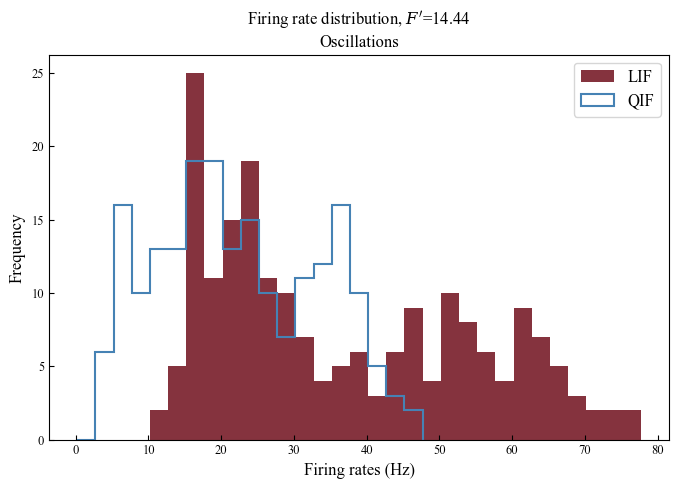

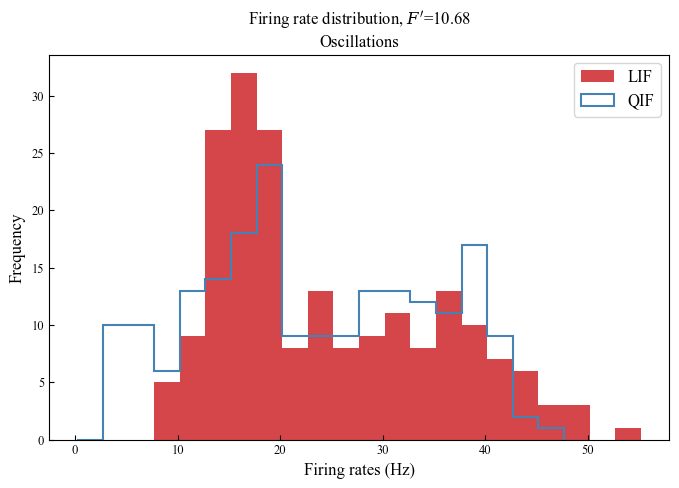

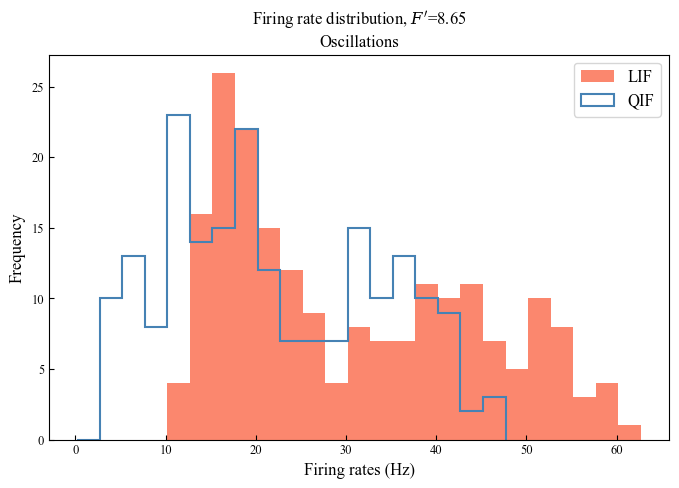

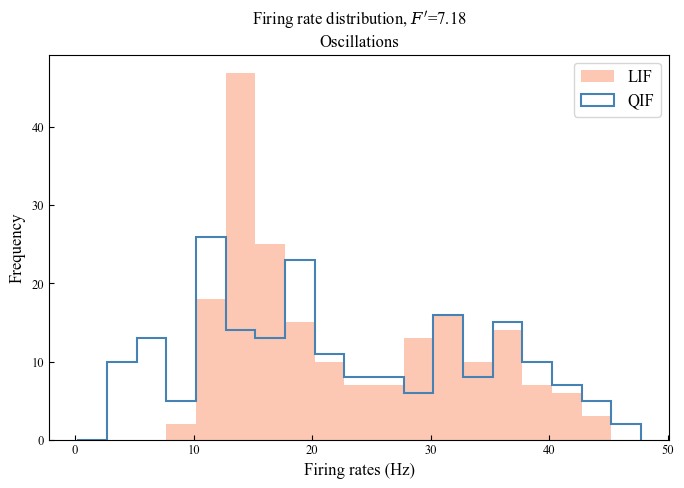

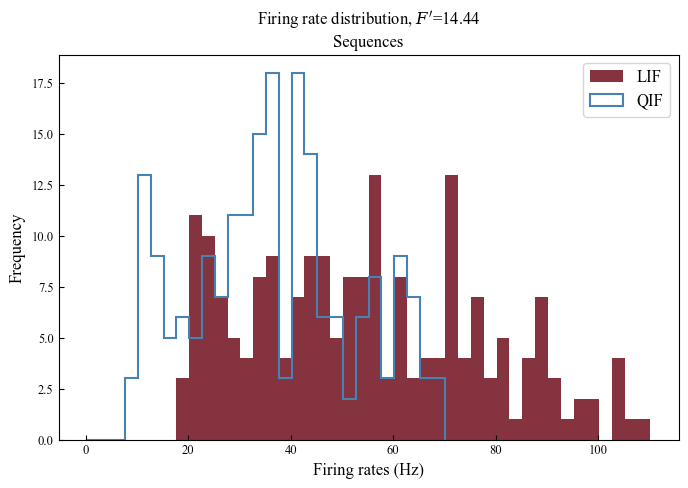

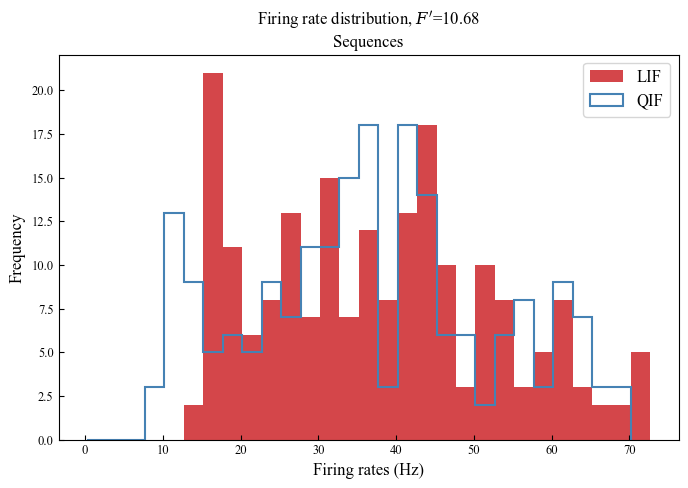

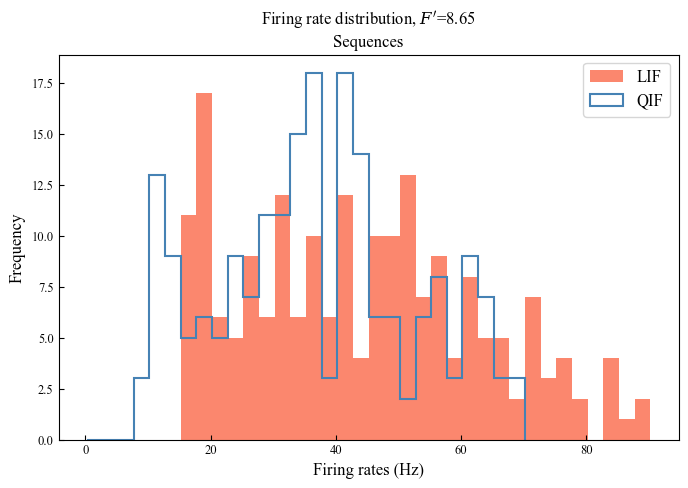

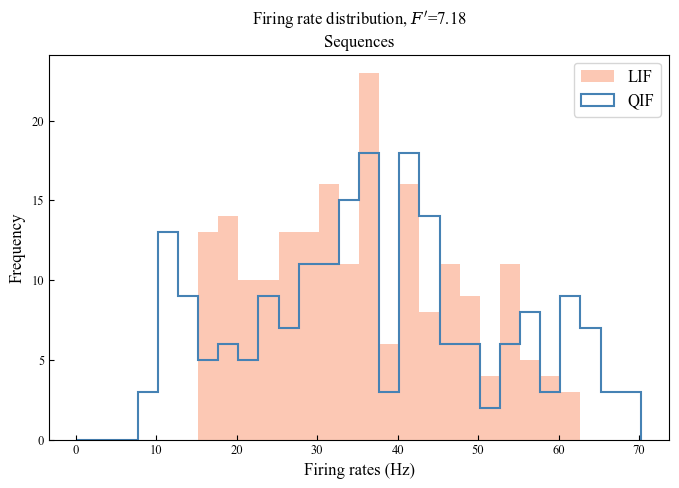

finished


In [41]:
# ========== Firing rate distributions ==========

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple
import matplotlib

from brokenaxes import brokenaxes
import sys

########## Initialization of lists of values needed ##########


# Simulation variables
simulation_number = [i for i in range(1, 5)]  # 1, 5 for osc;  9, 13 for seq
vr_number = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74

pqif_values = [0, 0.25, 0.5, 0.75, 1]
pqif_homogenous = [0, 1]
names_homogenous = ["LIF", "QIF"]
names = ["LIF", "MIX 0.25", "MIX 0.50", "MIX 0.75", "QIF"]

seed_number = [i for i in range(0, 1)]  # If only one seed, set to (0, 1)
dynamics = ['oscillations', 'sequences']


########## Time variables ##########
ms_per_file = 1000  # miliseconds
sec_after_learning = 5  # seconds after learning is from (inclusive) 11 to 16 (exclusive)
total_ms = ms_per_file * sec_after_learning  # 1000 * 5 = 5000 ms in total
T_seconds = total_ms / 1000  # To get in seconds so we get Hz


########## Make dataframe ##########

results = []  # Store all results
dicts = []  # store all dicts

for dyn in dynamics:

    #### Correct simulaton numbers from dynamics

    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()


    for seed in seed_number:
        for sim, vr, f in zip(simulation_number, vr_number, slope):
            fig, axs = plt.subplots(figsize=(8,5))
            ax = axs
            for pq, name in zip(pqif_homogenous, names_homogenous):


                # Formatting
                if pq == 0:
                    histtype='bar'
                    color = color_map_vrest[vr]
                    linestyle=''
                    linewidth=''

                elif pq == 1:
                    #do something
                    histtype='step'
                    color='steelblue'
                else:
                    print("Only use homogenous networks here")
                    sys.exit

                linestyle='-'
                linewidth=1.5

                kwargs = {
                    "histtype": histtype,
                    "color": color
                }

                if histtype == 'step':
                    kwargs["linestyle"] = linestyle
                    kwargs["linewidth"] = linewidth
                else:
                    kwargs["alpha"] = 0.8

                try:

                    spike_blocks = [np.loadtxt(f'{dyn}\simulation_{sim}\simulation_{sim}_nspikes\simulation_{sim}_nspikes_pqif_{pq}_iloop_{i}_seed_0.csv', delimiter=',') for i in range(11, 16)]  # load all nspikes files after learning, 11-16
                    spikes_all = np.vstack(spike_blocks)  # Stack them: Gives shape (5000, 200) i.e. the full 5 seconds for all 200 neurons

                except FileNotFoundError:  # In case there are missing files, let the program still plot for the rest, but notify
                    print(f"File not found: {sim}: {pq}, will be skipped.")
                    continue  # Go to next iteration


                # Convert the numpy array containing all spikes into a dataframe 

                spikes_df = pd.DataFrame(spikes_all)

                # Print and display just to confirm how it looks
                # print(f"Pqif {pq} vr: {vr}")
                # display(spikes_df)

                ########## Firing rate for neuron i: Sum across column i (that neuron's spikes over 5 sec), divide by total time ##########

                spike_counts = spikes_df.sum(axis=0)  # returns a Pandas series indexed by column number containing spike sum for neuron i

                spikes_per_neuron = spike_counts.values  # numpy array shape (neurons, )

                firing_rate_hz = spikes_per_neuron / T_seconds  # elementwise division, gives each neurons firing rate

                ########## Figure ##########
                bin_width = 2.5  # Hz
                bins = np.arange(0.2, firing_rate_hz.max() + bin_width, bin_width)

                ax.hist(firing_rate_hz, bins=bins, log=False, density=False, label=name, **kwargs)   # Normalize with density?
                ax.set_title(f"Firing rate distribution, $F'$={f}\n{dyn.capitalize()}")
                ax.set_xlabel("Firing rates (Hz)")
                # ax.set_xlim(-6, 6)
                # ax.set_xticks(xticks)
                # ax.axvline(0, color='black', linestyle='--', linewidth=1)
                ax.set_ylabel("Frequency")
                ax.legend()

        plt.show()


print("finished")

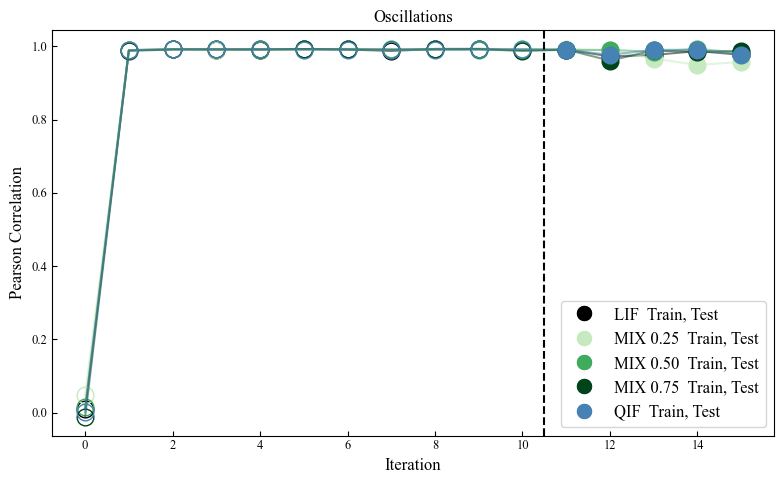

In [ ]:
# ========== Correlation, Oscillations (NOT BROKEN AXIS) ==========

# Imports
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from brokenaxes import brokenaxes

########## Initializations ##########


# Simulation variables
simulation_number = [i for i in range(1,5)]  # or 9, 13 if sequences
vr_number = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
pqif_values = [0, 0.25, 0.5, 0.75, 1]
names = ["LIF", "MIX 0.25", "MIX 0.50", "MIX 0.75", "QIF"]
seed_number = [i for i in range(0, 5)]  # If only one seed, set to (0, 1)

# Parameters used during oscillation
N = 200
pq = 0
idx = 1
itmax = 1000
itstim = 200 
nloop = 16



# Create figure
fig, ax = plt.subplots(figsize=(8,5))

for pq, nombre in zip(pqif_values, names):
    # Formatting
    color = color_map_pqif[pq]
    cc = np.zeros(nloop)  # Initialize array
    cc_std = np.zeros(nloop)  # Initialize array for std

    for iloop in range(nloop):
        # Load target
        target_csv = pd.read_csv(f'oscillations/simulation_{idx}/simulation_{idx}_targets_{pq}.csv')
        targets = target_csv.values

        file = f'oscillations/simulation_{idx}/simulation_{idx}_inputs/simulation_{idx}_inputs_pqif_{pq}_iloop_{iloop}_seed_0.csv'  # load input
        df = pd.read_csv(file, header=None).values
        ci = np.zeros(N)
        for i in range(N):
            rout_i = df[:, i]
            if np.var(targets[itstim:, i]) > 0 and np.var(rout_i[itstim:]) > 0:  # If variance above 0
                ci[i] = pearsonr(targets[itstim:, i], rout_i[itstim:])[0]  # Pearson R of target and input
        cc[iloop] = np.mean(ci)
        cc_std[iloop] = np.std(ci)

    # Plot curves and markers
    ax.plot(np.arange(nloop), cc, color=color, alpha=0.5)
    ax.plot(np.arange(1, 11), cc[1:11], 'o', markersize=12, color=color, markerfacecolor='none')
    ax.plot(np.arange(11, 16), cc[11:], 'o', markersize=12, color=color, markerfacecolor=color)
    ax.plot(0, cc[0], 'o', color=color, markersize=12, markerfacecolor='none')

# Labels and scales
ax.set_title('Oscillations')
ax.axvline(10.5, color='black', linestyle="--")
ax.set_xlabel('Iteration')
ax.set_ylabel('Pearson Correlation')

# Optional: custom legend
legend_elements = []
labels = []
for nombre, pq in zip(names, pqif_values):
    color = color_map_pqif[pq]
    train_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                          markersize=10, linestyle='None')
    test_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor=color,
                         markersize=10, linestyle='None')
    legend_elements.append((train_marker, test_marker))
    labels.append(f"{nombre}  Train, Test")

ax.legend(legend_elements, labels, handler_map={tuple: HandlerTuple()}, loc='lower right')

plt.tight_layout()

plt.show()

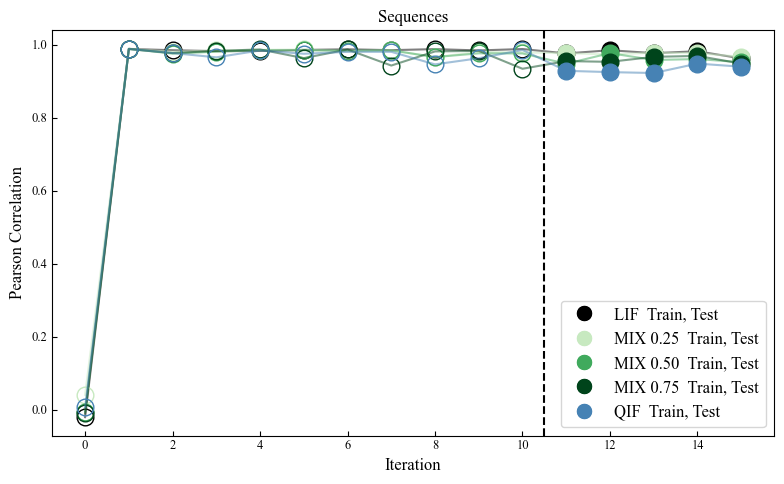

In [ ]:
# ========== Correlation, Sequences (NOT BROKEN AXIS) ==========

# Imports
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from brokenaxes import brokenaxes

########## Initializations ##########


# Simulation variables
simulation_number = [i for i in range(9,13)]  # or 9, 13 if sequences
vr_number = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
pqif_values = [0, 0.25, 0.5, 0.75, 1]
names = ["LIF", "MIX 0.25", "MIX 0.50", "MIX 0.75", "QIF"]
seed_number = [i for i in range(0, 5)]  # If only one seed, set to (0, 1)

# Parameters used during oscillation
N = 200
pq = 0
idx = 9
itmax = 1000
itstim = 200 
nloop = 16



# Create figure
fig, ax = plt.subplots(figsize=(8,5))

for pq, nombre in zip(pqif_values, names):
    # Formatting
    color = color_map_pqif[pq]
    cc = np.zeros(nloop)  # Initialize array
    cc_std = np.zeros(nloop)  # Initialize array for std

    for iloop in range(nloop):
        # Load target
        target_csv = pd.read_csv(f'sequences/simulation_{idx}/simulacion_{idx}_targets_{pq}.csv')
        targets = target_csv.values

        file = f'sequences/simulation_{idx}/simulation_{idx}_inputs/simulation_{idx}_inputs_pqif_{pq}_iloop_{iloop}_seed_0.csv'  # load input
        df = pd.read_csv(file, header=None).values
        ci = np.zeros(N)
        for i in range(N):
            rout_i = df[:, i]
            if np.var(targets[itstim:, i]) > 0 and np.var(rout_i[itstim:]) > 0:  # If variance above 0
                ci[i] = pearsonr(targets[itstim:, i], rout_i[itstim:])[0]  # Pearson R of target and input
        cc[iloop] = np.mean(ci)
        cc_std[iloop] = np.std(ci)

    # Plot curves and markers
    ax.plot(np.arange(nloop), cc, color=color, alpha=0.5)
    ax.plot(np.arange(1, 11), cc[1:11], 'o', markersize=12, color=color, markerfacecolor='none')
    ax.plot(np.arange(11, 16), cc[11:], 'o', markersize=12, color=color, markerfacecolor=color)
    ax.plot(0, cc[0], 'o', color=color, markersize=12, markerfacecolor='none')

# Labels and scales
ax.set_title('Sequences')
ax.axvline(10.5, color='black', linestyle="--")
ax.set_xlabel('Iteration')
ax.set_ylabel('Pearson Correlation')

# Optional: custom legend
legend_elements = []
labels = []
for nombre, pq in zip(names, pqif_values):
    color = color_map_pqif[pq]
    train_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                          markersize=10, linestyle='None')
    test_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor=color,
                         markersize=10, linestyle='None')
    legend_elements.append((train_marker, test_marker))
    labels.append(f"{nombre}  Train, Test")

ax.legend(legend_elements, labels, handler_map={tuple: HandlerTuple()}, loc='lower right')

plt.tight_layout()

plt.show()

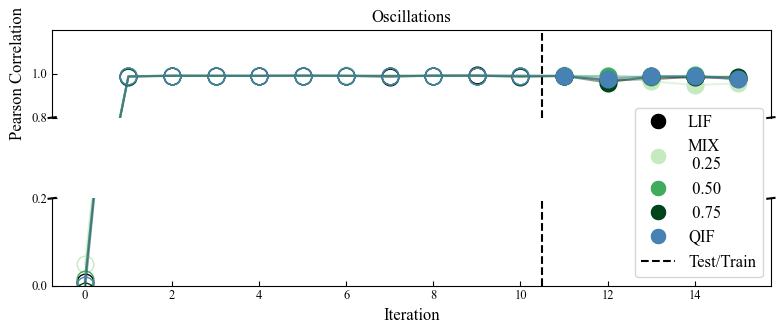

In [90]:
# ========== Correlation WITH BROKEN AXIS ==========

# Imports
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from brokenaxes import brokenaxes

########## Initializations ##########


# Simulation variables
simulation_number = [i for i in range(9,13)]  # or 9, 13 if sequences
vr_number = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
pqif_values = [0, 0.25, 0.5, 0.75, 1]
names = ["LIF", f"MIX\n 0.25", " 0.50", " 0.75", "QIF"]
seed_number = [i for i in range(0, 5)]  # If only one seed, set to (0, 1)

# Parameters used during oscillation
N = 200
pq = 0
idx = 1
itmax = 1000
itstim = 200 
nloop = 16

yticks_top = [0.80, 1]
yticks_bottom = [0, 0.2]


# Create figure
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1, sharex=True, figsize=(8,3.5)
    )

for pq, nombre in zip(pqif_values, names):
    # Formatting
    color = color_map_pqif[pq]
    cc = np.zeros(nloop)  # Initialize array
    cc_std = np.zeros(nloop)  # Initialize array for std

    for iloop in range(nloop):
        # Load target
        target_csv = pd.read_csv(f'oscillations/simulation_{idx}/simulation_{idx}_targets_{pq}.csv')
        targets = target_csv.values

        file = f'oscillations/simulation_{idx}/simulation_{idx}_inputs/simulation_{idx}_inputs_pqif_{pq}_iloop_{iloop}_seed_0.csv'  # load input
        df = pd.read_csv(file, header=None).values
        ci = np.zeros(N)
        for i in range(N):
            rout_i = df[:, i]
            if np.var(targets[itstim:, i]) > 0 and np.var(rout_i[itstim:]) > 0:  # If variance above 0
                ci[i] = pearsonr(targets[itstim:, i], rout_i[itstim:])[0]  # Pearson R of target and input
        cc[iloop] = np.mean(ci)
        cc_std[iloop] = np.std(ci)

    # Plot curves and markers ON BOTH AXES
    ax_top.plot(np.arange(nloop), cc, color=color, alpha=0.5)
    ax_top.plot(np.arange(1, 11), cc[1:11], 'o', markersize=12, color=color, markerfacecolor='none')
    ax_top.plot(np.arange(11, 16), cc[11:], 'o', markersize=12, color=color, markerfacecolor=color)
    ax_top.plot(0, cc[0], 'o', color=color, markersize=12, markerfacecolor='none')

    ax_bottom.plot(np.arange(nloop), cc, color=color, alpha=0.5)
    ax_bottom.plot(np.arange(1, 11), cc[1:11], 'o', markersize=12, color=color, markerfacecolor='none')
    ax_bottom.plot(np.arange(11, 16), cc[11:], 'o', markersize=12, color=color, markerfacecolor=color)
    ax_bottom.plot(0, cc[0], 'o', color=color, markersize=12, markerfacecolor='none')

# Break y axis
ax_top.set_ylim(0.80, 1.2)  # Upper range
ax_bottom.set_ylim(0, 0.2)  # Lower range

ax_top.set_yticks(yticks_top)
ax_bottom.set_yticks(yticks_bottom)

# Hide spines between axes

ax_top.spines['bottom'].set_visible(False)
ax_bottom.spines['top'].set_visible(False)

# Disable ticks where break is
ax_top.tick_params(labeltop=False, bottom=False),
ax_bottom.tick_params(top=False)

# Diagonal break marks
d = 0.005 # size of diagonal lines in axes coordinate
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax_bottom.transAxes)
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Labels and scales
ax_top.set_title('Oscillations')
ax_top.axvline(10.5, color='black', linestyle="--")
ax_bottom.axvline(10.5, color='black', linestyle="--")
ax_bottom.set_xlabel('Iteration')
ax_top.set_ylabel('Pearson Correlation')

# Optional: custom legend
legend_elements = []
labels = []
for nombre, pq in zip(names, pqif_values):
    color = color_map_pqif[pq]
    train_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                          markersize=10, linestyle='None')
    test_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor=color,
                         markersize=10, linestyle='None')
    legend_elements.append((train_marker, test_marker))
    labels.append(f"{nombre}")

vertical_line = Line2D([0], [0], color='black', linestyle='--')
legend_elements.append(vertical_line)
labels.append(f"Test/Train")

ax_bottom.legend(legend_elements, labels, handler_map={tuple: HandlerTuple()}, loc='lower right')

plt.tight_layout()

plt.show()

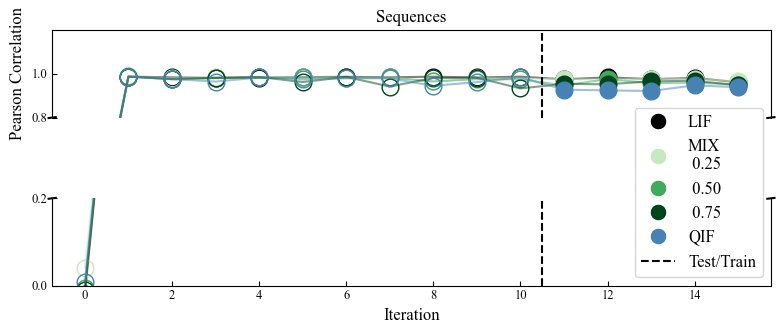

In [88]:
# ========== Correlation WITH BROKEN AXIS ==========

# Imports
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from brokenaxes import brokenaxes

########## Initializations ##########


# Simulation variables
simulation_number = [i for i in range(9,13)]  # or 9, 13 if sequences
vr_number = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
pqif_values = [0, 0.25, 0.5, 0.75, 1]
names = ["LIF", f"MIX\n 0.25", " 0.50", " 0.75", "QIF"]
seed_number = [i for i in range(0, 5)]  # If only one seed, set to (0, 1)

# Parameters used during oscillation
N = 200
pq = 0
idx = 9
itmax = 1000
itstim = 200 
nloop = 16

yticks_top = [0.80, 1]
yticks_bottom = [0, 0.2]


# Create figure
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1, sharex=True, figsize=(8,3.5)
    )

for pq, nombre in zip(pqif_values, names):
    # Formatting
    color = color_map_pqif[pq]
    cc = np.zeros(nloop)  # Initialize array
    cc_std = np.zeros(nloop)  # Initialize array for std

    for iloop in range(nloop):
        # Load target
        target_csv = pd.read_csv(f'sequences/simulation_{idx}/simulacion_{idx}_targets_{pq}.csv')
        targets = target_csv.values

        file = f'sequences/simulation_{idx}/simulation_{idx}_inputs/simulation_{idx}_inputs_pqif_{pq}_iloop_{iloop}_seed_0.csv'  # load input
        df = pd.read_csv(file, header=None).values
        ci = np.zeros(N)
        for i in range(N):
            rout_i = df[:, i]
            if np.var(targets[itstim:, i]) > 0 and np.var(rout_i[itstim:]) > 0:  # If variance above 0
                ci[i] = pearsonr(targets[itstim:, i], rout_i[itstim:])[0]  # Pearson R of target and input
        cc[iloop] = np.mean(ci)
        cc_std[iloop] = np.std(ci)

    # Plot curves and markers ON BOTH AXES
    ax_top.plot(np.arange(nloop), cc, color=color, alpha=0.5)
    ax_top.plot(np.arange(1, 11), cc[1:11], 'o', markersize=12, color=color, markerfacecolor='none')
    ax_top.plot(np.arange(11, 16), cc[11:], 'o', markersize=12, color=color, markerfacecolor=color)
    ax_top.plot(0, cc[0], 'o', color=color, markersize=12, markerfacecolor='none')

    ax_bottom.plot(np.arange(nloop), cc, color=color, alpha=0.5)
    ax_bottom.plot(np.arange(1, 11), cc[1:11], 'o', markersize=12, color=color, markerfacecolor='none')
    ax_bottom.plot(np.arange(11, 16), cc[11:], 'o', markersize=12, color=color, markerfacecolor=color)
    ax_bottom.plot(0, cc[0], 'o', color=color, markersize=12, markerfacecolor='none')

# Break y axis
ax_top.set_ylim(0.80, 1.2)  # Upper range
ax_bottom.set_ylim(0, 0.2)  # Lower range

ax_top.set_yticks(yticks_top)
ax_bottom.set_yticks(yticks_bottom)

# Hide spines between axes

ax_top.spines['bottom'].set_visible(False)
ax_bottom.spines['top'].set_visible(False)

# Disable ticks where break is
ax_top.tick_params(labeltop=False, bottom=False),
ax_bottom.tick_params(top=False)

# Diagonal break marks
d = 0.005 # size of diagonal lines in axes coordinate
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax_bottom.transAxes)
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Labels and scales
ax_top.set_title('Sequences')
ax_top.axvline(10.5, color='black', linestyle="--")
ax_bottom.axvline(10.5, color='black', linestyle="--")
ax_bottom.set_xlabel('Iteration')
ax_top.set_ylabel('Pearson Correlation')

# Optional: custom legend
legend_elements = []
labels = []
for nombre, pq in zip(names, pqif_values):
    color = color_map_pqif[pq]
    train_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                          markersize=10, linestyle='None')
    test_marker = Line2D([0], [0], marker='o', color=color, markerfacecolor=color,
                         markersize=10, linestyle='None')
    legend_elements.append((train_marker, test_marker))
    labels.append(f"{nombre}")

vertical_line = Line2D([0], [0], color='black', linestyle='--')
legend_elements.append(vertical_line)
labels.append(f"Test/Train")

ax_bottom.legend(legend_elements, labels, handler_map={tuple: HandlerTuple()}, loc='lower right')

plt.tight_layout()

plt.show()

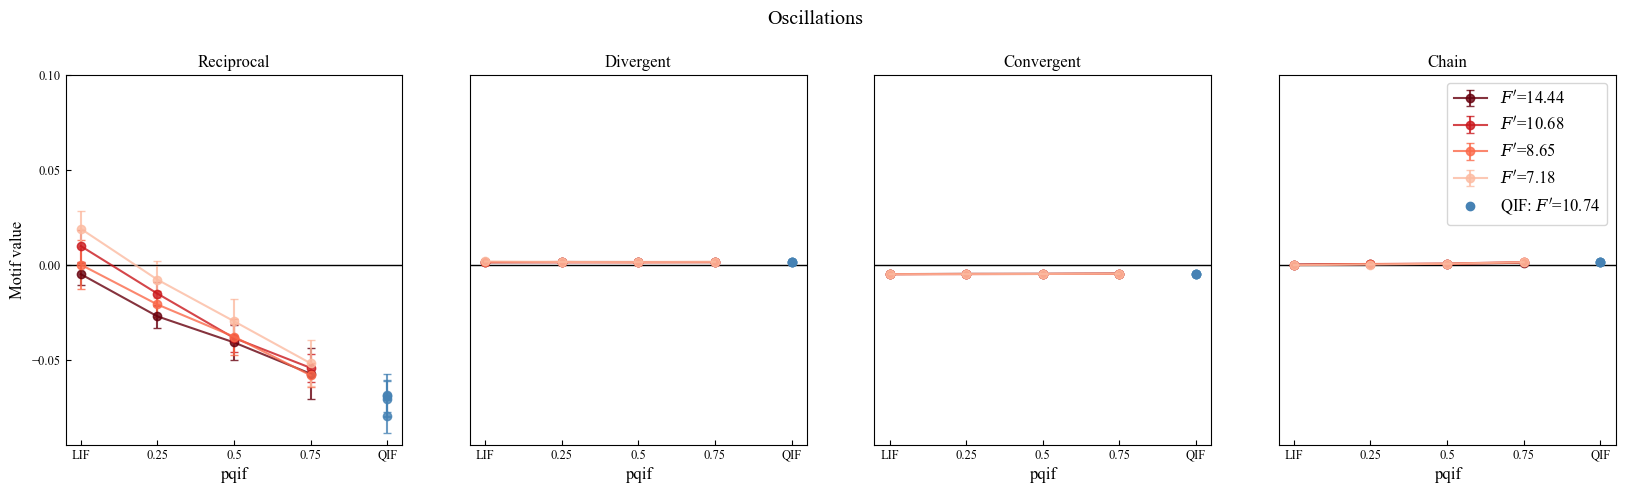

In [61]:
### This is the formatted version of across seeds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

pqif_values = [0, 0.25, 0.5, 0.75]
pure_qif = [1]
xnames = ['LIF', '0.25', '0.5', '0.75', 'QIF']
yticks = [-0.05, 0.00, 0.05, 0.10]

motifs = ["tau_rec", "tau_div", "tau_con", "tau_chn"]
motif_labels = {
    "tau_rec": "Reciprocal",
    "tau_div": "Divergent",
    "tau_con": "Convergent",
    "tau_chn": "Chain"
}

dynamics = ["oscillations", "sequences"]

simulations_osc = [1, 2, 3, 4]
simulations_seq = [9, 10, 11, 12]
# v_rest = [-22, -17, -12.3, -8.5]
v_rest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74

# colors_osc = ['lightblue', 'skyblue', 'dodgerblue', 'steelblue', 'navy']
# colors_seq = ['lightgreen', 'mediumseagreen', 'seagreen', 'forestgreen', 'darkgreen']

colors_osc = ['lightblue', 'skyblue', 'dodgerblue', 'steelblue']
colors_seq = ['lightgreen', 'mediumseagreen', 'seagreen', 'forestgreen']


df_oscillation = []
df_sequences = []

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

labeled = {"oscillations": False, "sequences": False}


for sim1, sim2, vrest, f, col1, col2 in zip(simulations_osc, simulations_seq, v_rest, slope, colors_osc, colors_seq):
# for sim1, sim2, col in zip(simulations_osc, simulations_seq, color_map):
    # First we take out correct dataframe


    for i, motif in enumerate(motifs):
        # Make axes objects for the figure, as many as there are motifs
        ax = axs[i]


        df_results = pd.read_csv(f'oscillations\simulation_{sim1}\simulation_{sim1}_results.csv')  # Current dataframe based on dynamics and simulation (vrest/slope)
        
        # color = col1
        color = color_map_vrest[vrest]
        sim = sim1
        line = '-'
        markerfacecolor = color

        edge = 'none'
        face = 'steelblue'

        osc_seeds = df_results['seed'].nunique()


        # Filter out correct nloop and divide pure QIF from the rest
        df_filtered = df_results[(df_results['nloop'] == 15) & (df_results['pqif'] != 1)]
        df_filtered_qif = df_results[(df_results['nloop'] == 15) & (df_results['pqif'] == 1)]

        #  Group into buckets: Current motif across the pqif values
        grp = df_filtered.groupby("pqif")[motif]  # e.g.: reciprocal motif across pqif 0-0.75, for n seeds
        grp2 = df_filtered_qif.groupby("pqif")[motif] # same across QIF only, for n seeds


        # Calculate mean and standard deviation of y values in current motif
        # LIF-MIX
        y_mean = grp.mean()  # Mean across seeds for the motif values
        y_std = grp.std(ddof=1)  # SD across seeds for the motif values
        # QIF
        y_mean_qif = grp2.mean()
        y_std_qif = grp2.std(ddof=1)

        # Make into numpy arrays for plotting
        p_vals = y_mean.index.to_numpy()
        y_vals = y_mean.to_numpy()
        y_err = y_std.to_numpy()

        p_vals2 = y_mean_qif.index.to_numpy()
        y_vals2 = y_mean_qif.to_numpy()
        y_err2 = y_std_qif.to_numpy()



        # here we plot all pqif and corresponding current motif (e.g. reciprocal)
        ax.errorbar(
            p_vals, y_vals, yerr=y_err, fmt='o', capsize=3, color=color, markerfacecolor=markerfacecolor, linestyle=line, alpha=0.8, label=f"$F'$={f}",
        )

        ax.errorbar(
            p_vals2, y_vals2, yerr=y_err2, fmt='o', capsize=3, color='steelblue', markeredgecolor='steelblue', markerfacecolor=face, alpha=0.8,
        )

        ax.set_title(f"{motif_labels[motif]}")
        # ax.label(dyn)
        ax.set_xlabel('pqif')
        ax.set_ylabel('Motif value')
        # ax.set_ylim(-0.05, 0.10)
        ax.set_yticks(yticks)
        ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
        ax.set_xticklabels(xnames)
        ax.axhline(0, color='black', linewidth=0.8)


example_color = color_map_vrest[-8.5]

qif_label = plt.Line2D([0], [0], color="steelblue", marker='o', linestyle="None")
handles, labels = ax.get_legend_handles_labels()
handles.append(qif_label)
labels.append(f"QIF: $F'$={slope_qif}")

# legend_handles = [
#     Line2D([0], [0], color=example_color, linestyle='-', label='Oscillations'),
#     # Line2D([0], [0], color=example_color, linestyle='--', label='Sequences'),
#     Line2D([0], [0], color='steelblue', marker='o', linestyle='None', label='QIF (oscillations)'),
#     Line2D([0], [0], color='steelblue', marker='o', markerfacecolor='none', linestyle='None', label='QIF (sequences)')
# ]

for ax in axs[1:]:
    ax.yaxis.set_visible(False)

# plt.text(0.4, 0.8, f"Test text box", horizontalalignment='center')
# plt.tight_layout(rect=[0, 0, 1, 0.9])
# ax.legend(handles=legend_handles, frameon=True)
# plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(0.98, 0.5))
plt.legend(handles, labels)
plt.suptitle("Oscillations")
plt.subplots_adjust(top=0.85)
plt.show()





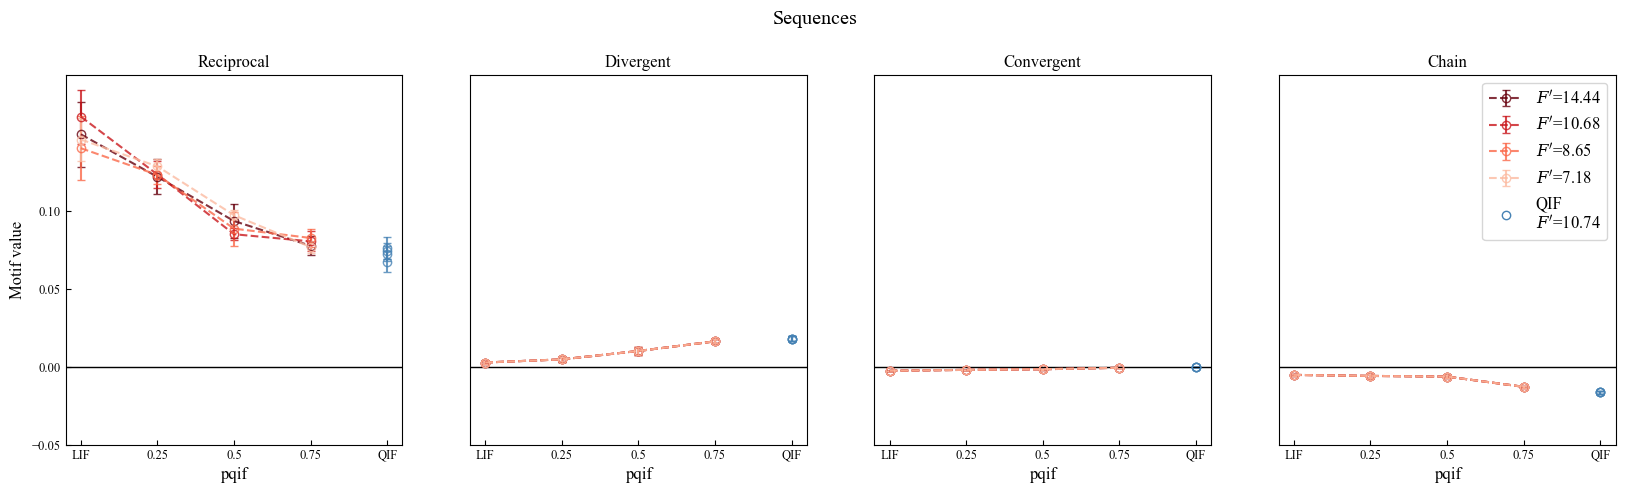

In [66]:
### Connectivity motifs sequences

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

pqif_values = [0, 0.25, 0.5, 0.75]
pure_qif = [1]
xnames = ['LIF', '0.25', '0.5', '0.75', 'QIF']
yticks = [-0.05, 0.00, 0.05, 0.10]

motifs = ["tau_rec", "tau_div", "tau_con", "tau_chn"]
motif_labels = {
    "tau_rec": "Reciprocal",
    "tau_div": "Divergent",
    "tau_con": "Convergent",
    "tau_chn": "Chain"
}

dynamics = ["oscillations", "sequences"]

simulations_osc = [1, 2, 3, 4]
simulations_seq = [9, 10, 11, 12]
# v_rest = [-22, -17, -12.3, -8.5]
v_rest = [-8.5, -12.3, -17, -22]
slope = [14.44, 10.68, 8.65, 7.18]
slope_qif = 10.74

# colors_osc = ['lightblue', 'skyblue', 'dodgerblue', 'steelblue', 'navy']
# colors_seq = ['lightgreen', 'mediumseagreen', 'seagreen', 'forestgreen', 'darkgreen']

colors_osc = ['lightblue', 'skyblue', 'dodgerblue', 'steelblue']
colors_seq = ['lightgreen', 'mediumseagreen', 'seagreen', 'forestgreen']


df_oscillation = []
df_sequences = []

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

labeled = {"oscillations": False, "sequences": False}
labeled = True

for sim, vrest, f, col1, col2 in zip(simulations_seq, v_rest, slope, colors_osc, colors_seq):
# for sim1, sim2, col in zip(simulations_osc, simulations_seq, color_map):
    # First we take out correct dataframe


    for i, motif in enumerate(motifs):
        # Make axes objects for the figure, as many as there are motifs
        ax = axs[i]

        df_results = pd.read_csv(f'sequences\simulation_{sim}\simulation_{sim}_results.csv')

        # color = col2
        color = color_map_vrest[vrest]
        sim = sim2
        line = '--'
        markerfacecolor = 'none'

        edge = 'steelblue'
        face ='none'

        sec_seeds = df_results['seed'].nunique()


        # Filter out correct nloop and divide pure QIF from the rest
        df_filtered = df_results[(df_results['nloop'] == 15) & (df_results['pqif'] != 1)]
        df_filtered_qif = df_results[(df_results['nloop'] == 15) & (df_results['pqif'] == 1)]

        #  Group into buckets: Current motif across the pqif values
        grp = df_filtered.groupby("pqif")[motif]  # e.g.: reciprocal motif across pqif 0-0.75, for n seeds
        # print(grp.describe())
        grp2 = df_filtered_qif.groupby("pqif")[motif] # same across QIF only, for n seeds


        # Calculate mean and standard deviation of y values in current motif
        # LIF-MIX
        y_mean = grp.mean()  # Mean across seeds for the motif values
        y_std = grp.std(ddof=1)  # SD across seeds for the motif values
        # QIF
        y_mean_qif = grp2.mean()
        y_std_qif = grp2.std(ddof=1)

        # Make into numpy arrays for plotting
        p_vals = y_mean.index.to_numpy()
        y_vals = y_mean.to_numpy()
        y_err = y_std.to_numpy()

        p_vals2 = y_mean_qif.index.to_numpy()
        y_vals2 = y_mean_qif.to_numpy()
        y_err2 = y_std_qif.to_numpy()

        if sim == simulations_seq[0]:
            label = f"LIF\n$F'$={f}"
        else:
            label = f"$F'$={f}"

        # here we plot all pqif and corresponding current motif (e.g. reciprocal)
        ax.errorbar(
            p_vals, y_vals, yerr=y_err, fmt='o', capsize=3, color=color, markerfacecolor=markerfacecolor, linestyle=line, alpha=0.8, label=label,
        )


        ax.errorbar(
            p_vals2, y_vals2, yerr=y_err2, fmt='o', capsize=3, color='steelblue', markeredgecolor='steelblue', markerfacecolor=face, alpha=0.8,
        )

        labeled=False

        ax.set_title(f"{motif_labels[motif]}")
        # ax.label(dyn)
        ax.set_xlabel('pqif')
        ax.set_ylabel('Motif value')
        # ax.set_ylim(-0.05, 0.10)
        ax.set_yticks(yticks)
        ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
        ax.set_xticklabels(xnames)
        ax.axhline(0, color='black', linewidth=0.8)


example_color = color_map_vrest[-8.5]
qif_label = plt.Line2D([0], [0], color="steelblue", marker='o', markerfacecolor='none', linestyle="None")
handles, labels = ax.get_legend_handles_labels()
handles.append(qif_label)
labels.append(f"QIF\n$F'$={slope_qif}")


for ax in axs[1:]:
    ax.yaxis.set_visible(False)


plt.legend(handles, labels)

plt.suptitle("Sequences")
plt.subplots_adjust(top=0.85)
plt.show()





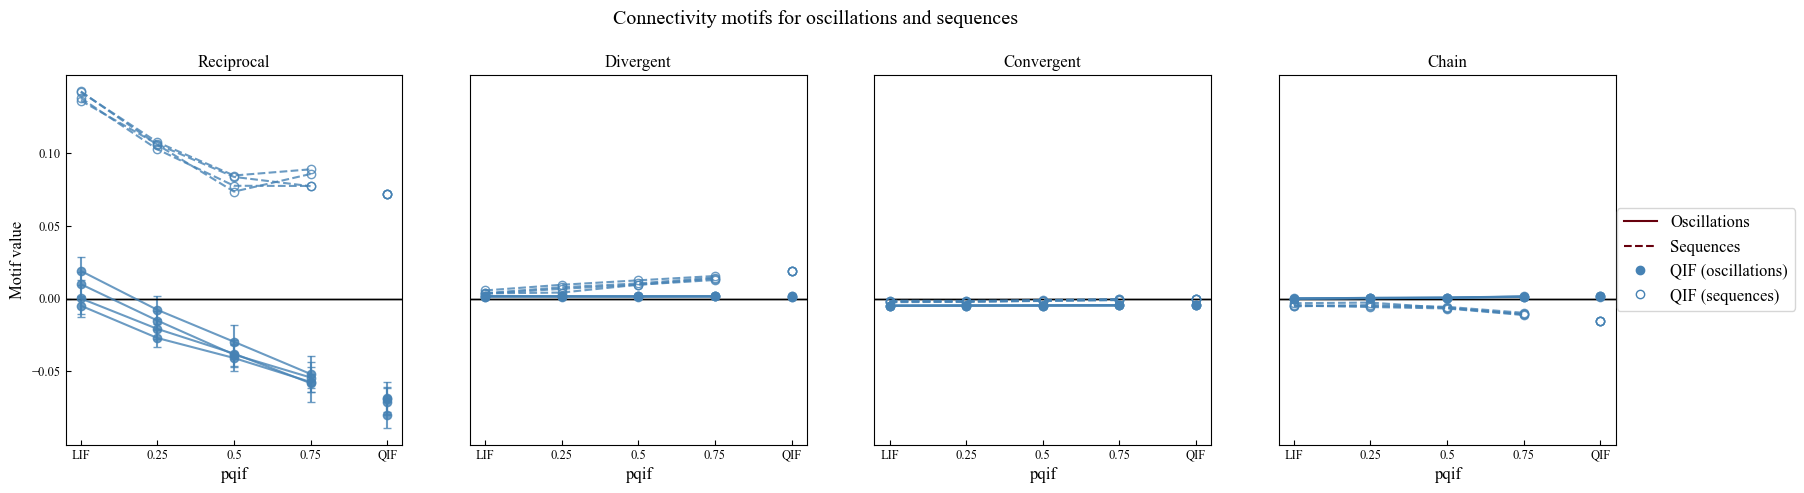

In [53]:
# ========== Connectivity motifs ==========
### This is the formatted version of across seeds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

pqif_values = [0, 0.25, 0.5, 0.75]
pure_qif = [1]
xnames = ['LIF', '0.25', '0.5', '0.75', 'QIF']
yticks = [-0.05, 0.00, 0.05, 0.10]

motifs = ["tau_rec", "tau_div", "tau_con", "tau_chn"]
motif_labels = {
    "tau_rec": "Reciprocal",
    "tau_div": "Divergent",
    "tau_con": "Convergent",
    "tau_chn": "Chain"
}

dynamics = ["oscillations", "sequences"]

simulations_osc = [1, 2, 3, 4]
simulations_seq = [9, 10, 11, 12]
# v_rest = [-22, -17, -12.3, -8.5]
v_rest = [-8.5, -12.3, -17, -22]

# colors_osc = ['lightblue', 'skyblue', 'dodgerblue', 'steelblue', 'navy']
# colors_seq = ['lightgreen', 'mediumseagreen', 'seagreen', 'forestgreen', 'darkgreen']

colors_osc = ['lightblue', 'skyblue', 'dodgerblue', 'steelblue']
colors_seq = ['lightgreen', 'mediumseagreen', 'seagreen', 'forestgreen']


df_oscillation = []
df_sequences = []

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

labeled = {"oscillations": False, "sequences": False}

for dyn in dynamics:

    
    if dyn == 'oscillations':
        simulation_number = [i for i in range(1,5)]
    elif dyn == 'sequences':
        simulation_number = [i for i in range(9, 13)]
    else:
        print('Invalid dynamics')
        sys.exit()


    for sim, vrest in zip(simulation_number, v_rest):



        for i, motif in enumerate(motifs):
            # Make axes objects for the figure, as many as there are motifs
            ax = axs[i]

            df_results = pd.read_csv(f"{dyn}\simulation_{sim}\simulation_{sim}_results.csv")
            
            colors = color_map_vrest[vrest]

            if dyn == "oscillations":
                line = '-'
                markerfacecolor = color
                edge = 'none'
                face = 'steelblue'

            elif dyn == "sequences":
                line = '--'
                markerfacecolor = 'none'
                edge = 'steelblue'
                face ='none'
            
            # Filter out correct nloop and divide pure QIF from the rest
            df_filtered = df_results[(df_results['nloop'] == 15) & (df_results['pqif'] != 1)]
            df_filtered_qif = df_results[(df_results['nloop'] == 15) & (df_results['pqif'] == 1)]

            #  Group into buckets: Current motif across the pqif values
            grp = df_filtered.groupby("pqif")[motif]  # e.g.: reciprocal motif across pqif 0-0.75, for n seeds
            grp2 = df_filtered_qif.groupby("pqif")[motif] # same across QIF only, for n seeds


            # Calculate mean and standard deviation of y values in current motif
            # LIF-MIX
            y_mean = grp.mean()  # Mean across seeds for the motif values
            y_std = grp.std(ddof=1)  # SD across seeds for the motif values
            # QIF
            y_mean_qif = grp2.mean()
            y_std_qif = grp2.std(ddof=1)

            # Make into numpy arrays for plotting
            p_vals = y_mean.index.to_numpy()
            y_vals = y_mean.to_numpy()
            y_err = y_std.to_numpy()

            p_vals2 = y_mean_qif.index.to_numpy()
            y_vals2 = y_mean_qif.to_numpy()
            y_err2 = y_std_qif.to_numpy()



            # here we plot all pqif and corresponding current motif (e.g. reciprocal)
            ax.errorbar(
                p_vals, y_vals, yerr=y_err, fmt='o', capsize=3, color=color, markerfacecolor=markerfacecolor, linestyle=line, alpha=0.8,
            )

            ax.errorbar(
                p_vals2, y_vals2, yerr=y_err2, fmt='o', capsize=3, color='steelblue', markeredgecolor='steelblue', markerfacecolor=face, alpha=0.8,
            )

            ax.set_title(f"{motif_labels[motif]}")
            # ax.label(dyn)
            ax.set_xlabel('pqif')
            ax.set_ylabel('Motif value')
            # ax.set_ylim(-0.05, 0.10)
            ax.set_yticks(yticks)
            ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
            ax.set_xticklabels(xnames)
            ax.axhline(0, color='black', linewidth=0.8)


# example_color = make_color_map(-8.5)
example_color = color_map_vrest[-8.5]
legend_handles = [
    Line2D([0], [0], color=example_color, linestyle='-', label='Oscillations'),
    Line2D([0], [0], color=example_color, linestyle='--', label='Sequences'),
    Line2D([0], [0], color='steelblue', marker='o', linestyle='None', label='QIF (oscillations)'),
    Line2D([0], [0], color='steelblue', marker='o', markerfacecolor='none', linestyle='None', label='QIF (sequences)')
]

for ax in axs[1:]:
    ax.yaxis.set_visible(False)

# plt.text(0.4, 0.8, f"Test text box", horizontalalignment='center')
# plt.tight_layout(rect=[0, 0, 1, 0.9])
# ax.legend(handles=legend_handles, frameon=True)
plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(0.98, 0.5))

plt.suptitle("Connectivity motifs for oscillations and sequences")
plt.subplots_adjust(top=0.85)
plt.show()





# Test things

Text(0.5, 1.0, 'Simulated dynamics')

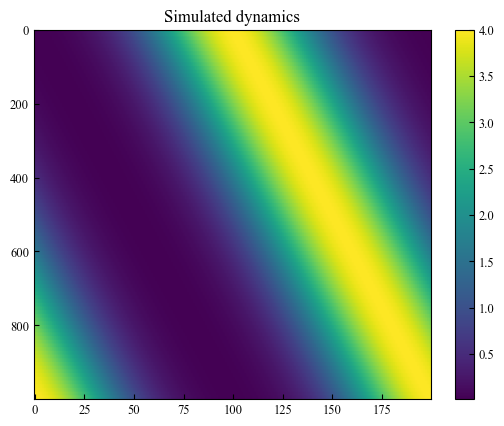

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import os

df = pd.read_csv('sequences\simulation_9\simulation_9_targets_0.csv')
# df = pd.read_csv('oscillations\simulation_1\simulation_1_targets_0.5.csv')


arr = df.to_numpy()

plt.ion()
plt.figure()
im_R = plt.imshow(arr, aspect='auto') # Autoscale,
plt.colorbar()
plt.title("Simulated dynamics")

In [95]:
import matplotlib
print(matplotlib.__version__)

3.10.5
